# BITS F464 - Semester 1 - MACHINE LEARNING
## PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)

### Team number: 24

#### Full names of all students in the team:
Pavas Garg, Tushar Raghani, Rohan Pothireddy, Kolasani Amit Vishnu

#### Id number of all students in the team:
2021A7PS2587H, 2021A7PS1404H, 2021A7PS0365H, 2021A7PS0151H

## ```Importing The Libraries```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

## ```Importing the Dataset```

In [2]:
df = pd.read_csv("Economic_Growth_Trend.csv")
row_0 = df.columns.values.tolist()
df.head()

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


# ```1. 🔬Preprocessing of Dataset```

In [3]:
# adding attribute names for the dataset
attribute_names = ["Checking Account","Duration in Month","Credit History","Purpose","Credit Amount",
                        "Savings Account/Bonds","Present employment since",
                        "Installment rate in percentage of disposable income","Personal status and sex",
                        "Other debtors / guarantors","Present residence since",
                        "Property","Age in years","Other installment plans","Housing",
                        "Number of existing credits at this bank","Job",
                        "Number of people being liable to provide maintenance for","Telephone",
                        "Foreign Worker","Customer Classification"
                  ]
df.columns = attribute_names

# function to check if string is float or not
def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

# adding the row_0 to the dataframe
dic = {}
for index in range(0,len(attribute_names)):
    if row_0[index].isnumeric() or is_float(row_0[index]):
        dic[attribute_names[index]] = int(float(row_0[index]))
    else:
        dic[attribute_names[index]] = row_0[index]
        
dic = pd.DataFrame(dic,index=[-1])
df = pd.concat([dic,df.loc[:]])
df = df.rename(index = lambda x:x+1)

print("Number of observations in this dataset are: ",len(df))
print("Number of features in this dataset are: ",len(df.columns)-1)
df.head()

Number of observations in this dataset are:  1000
Number of features in this dataset are:  20


,Checking Account,Duration in Month,Credit History,Purpose,Credit Amount,Savings Account/Bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign Worker,Customer Classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
# understanding the given data
df.describe()

,Duration in Month,Credit Amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Customer Classification
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


## ```Visualizing Numerical Features```

In [5]:
# sns.set()
df_numerical_features = df.select_dtypes(include='number')
df_numerical_features.head()

,Duration in Month,Credit Amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Customer Classification
0,6,1169,4,4,67,2,1,1
1,48,5951,2,2,22,1,1,2
2,12,2096,2,3,49,1,2,1
3,42,7882,2,4,45,1,2,1
4,24,4870,3,4,53,2,2,2


- ```This shows that most loans taken have shorter duration of repayment between 10-20 months, and there are very few loans with more than 60 months as duration for repayment.```
- ```Most loans taken have credit amount upto 5000, there are very few customers who take loans with very high credit amount.```

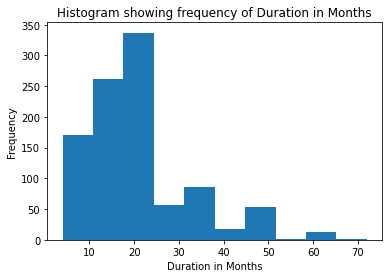

In [6]:
# Attribute - Duration in Months
plt.hist(df["Duration in Month"])
plt.xlabel("Duration in Months")
plt.ylabel("Frequency")
plt.title("Histogram showing frequency of Duration in Months")
plt.show()

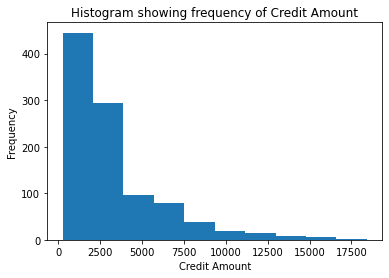

In [7]:
# Attribute - Credit Amount
plt.hist(df["Credit Amount"])
plt.xlabel("Credit Amount")
plt.ylabel("Frequency")
plt.title("Histogram showing frequency of Credit Amount")
plt.show()

### Relation between Credit Amount and Duration

- ```This shows that larger loan amounts have longer duration of repayment, larger loans with shorter duration of repayment turned out to be loss or bad loans.```

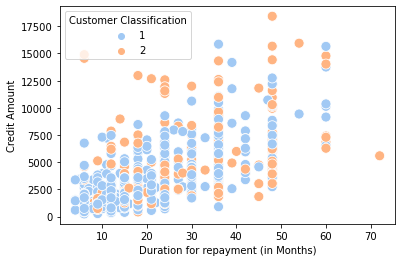

In [8]:
scatter = sns.scatterplot(y=df["Credit Amount"],x=df["Duration in Month"],hue=df["Customer Classification"],s=100,palette='pastel');
scatter.set_xlabel("Duration for repayment (in Months)")
scatter.set_ylabel("Credit Amount")
plt.show()

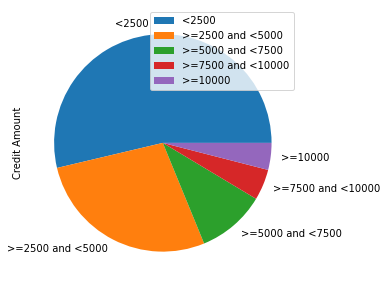

In [9]:
# plotting pie chart for credit amount, divide the amount into categories
credit_amount = df["Credit Amount"]
categories = ["<2500",">=2500 and <5000",">=5000 and <7500",">=7500 and <10000",">=10000"]
frequency_credit_amount = [0,0,0,0,0]
for val in credit_amount:
    if val < 2500:
        frequency_credit_amount[0] += 1
    elif val >= 2500 and val < 5000:
        frequency_credit_amount[1] += 1
    elif val >= 5000 and val < 7500:
        frequency_credit_amount[2] += 1
    elif val >= 7500 and val < 10000:
        frequency_credit_amount[3] += 1
    else:
        frequency_credit_amount[4] += 1
dictionary = dict(zip(categories, frequency_credit_amount))

# plotting pie chart
df_credit_amount = pd.DataFrame({'Credit Amount': frequency_credit_amount,},index=categories)
plot = df_credit_amount.plot.pie(y='Credit Amount', figsize=(5, 5))

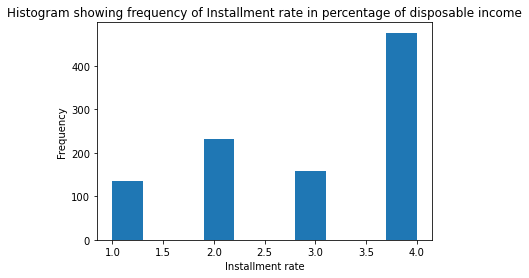

In [10]:
# Attribute - Installment rate in percentage of disposable income
plt.hist(df["Installment rate in percentage of disposable income"])
plt.xlabel("Installment rate")
plt.ylabel("Frequency")
plt.title("Histogram showing frequency of Installment rate in percentage of disposable income")
plt.show()

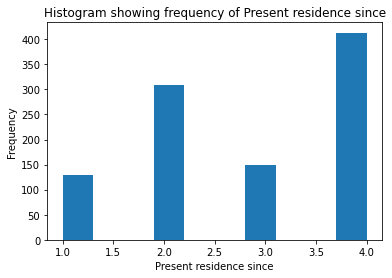

In [11]:
# Attribute - Present residence since
plt.hist(df["Present residence since"])
plt.xlabel("Present residence since")
plt.ylabel("Frequency")
plt.title("Histogram showing frequency of Present residence since")
plt.show()

- ```Majority of loan applicants have age between 20 and 40 years.```

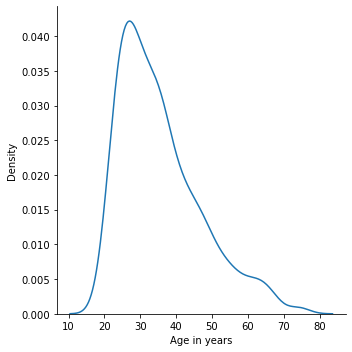

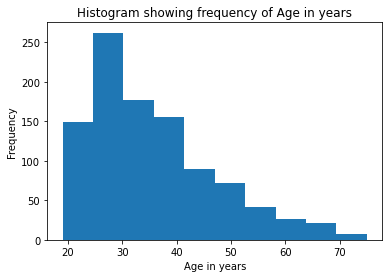

In [12]:
# Attribute - Age in years
sns.displot(df["Age in years"],kind="kde")
plt.show()
plt.hist(df["Age in years"])
plt.xlabel("Age in years")
plt.ylabel("Frequency")
plt.title("Histogram showing frequency of Age in years")
plt.show()

- ```Most of the applicants are taking loan for the first time in this bank.```

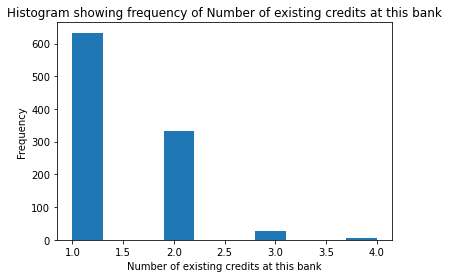

In [13]:
# Attribute - Number of existing credits at this bank
plt.hist(df["Number of existing credits at this bank"])
plt.xlabel("Number of existing credits at this bank")
plt.ylabel("Frequency")
plt.title("Histogram showing frequency of Number of existing credits at this bank")
plt.show()

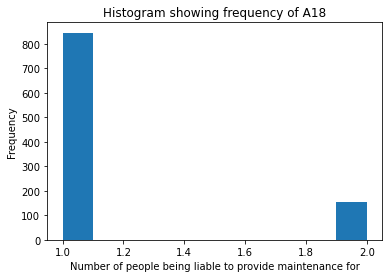

In [14]:
# Attribute - Number of people being liable to provide maintenance for
plt.hist(df["Number of people being liable to provide maintenance for"])
plt.xlabel("Number of people being liable to provide maintenance for")
plt.ylabel("Frequency")
plt.title("Histogram showing frequency of A18")
plt.show()

# ```Visualizing Class Imbalance```

In [15]:
df["Customer Classification"].value_counts()

1    700
2    300
Name: Customer Classification, dtype: int64

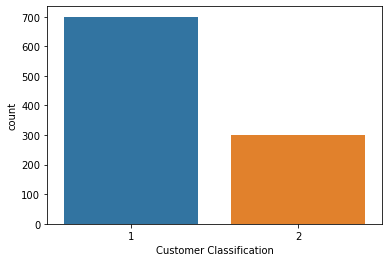

In [16]:
sns.countplot(x = 'Customer Classification',data = df)
plt.show()

```Here we can observe that number of samples in dataset for bad customers is much less than number of samples which correspond to good customer, hence there is class imbalance.```

# ```Correlation Matrix for Numerical Features```

- ```We can see that credit amount and duration are strongly related to each other.```

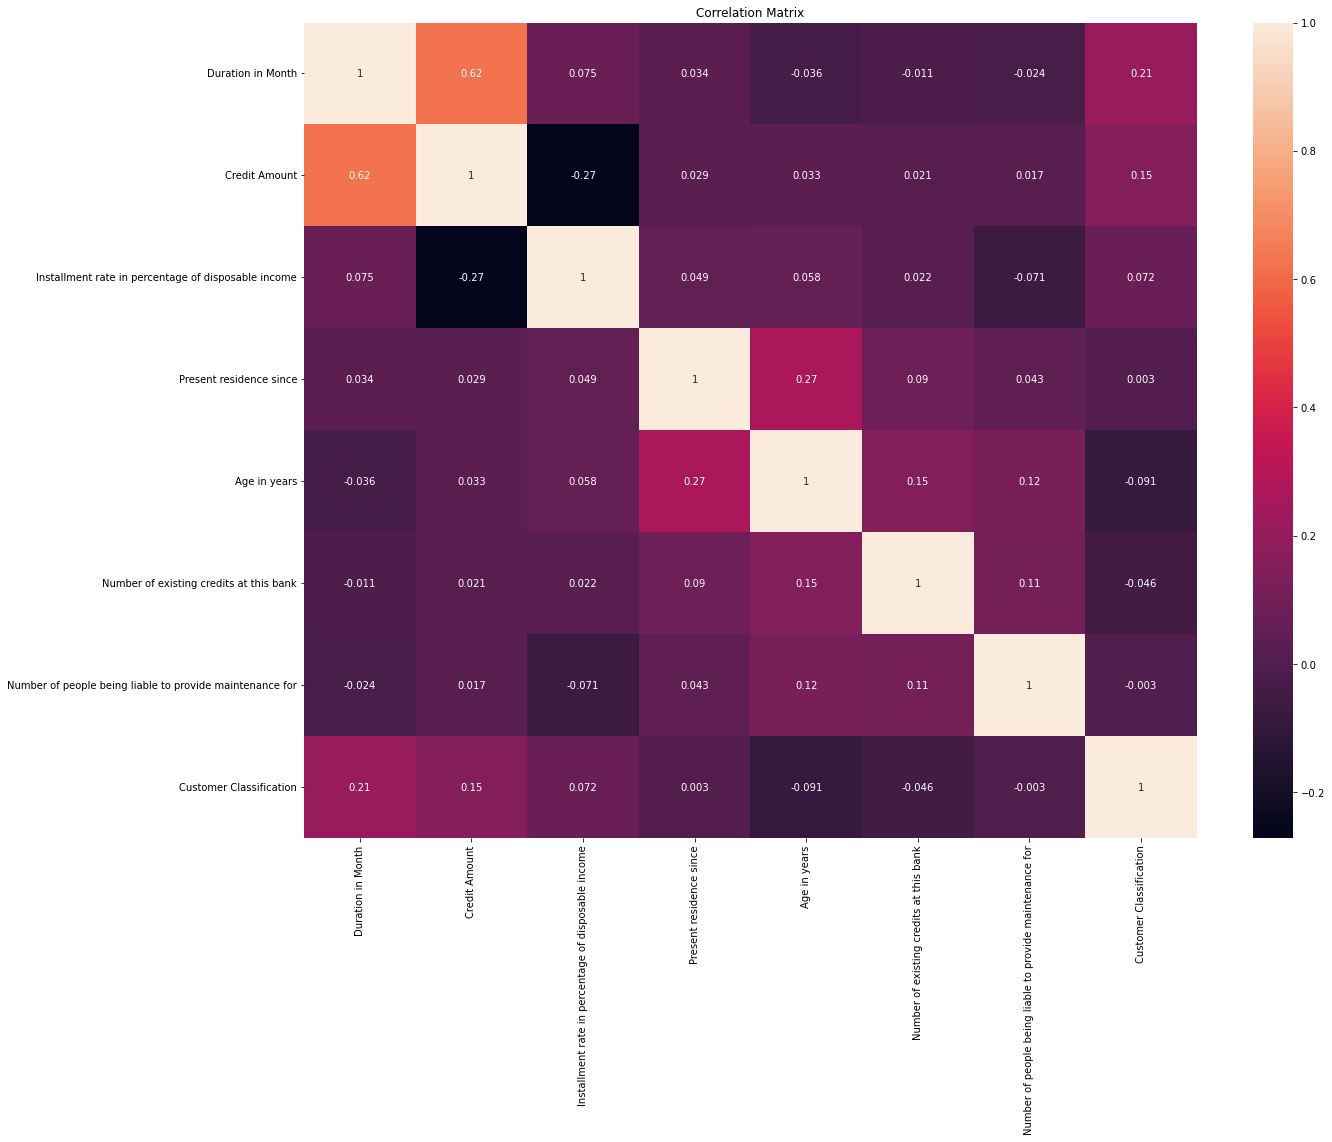

In [17]:
correlation = df.select_dtypes(include='number').corr()
plt.subplots(figsize=(20,15))
heatmap = sns.heatmap(correlation,annot=True)
heatmap.set(title='Correlation Matrix')
plt.show()

# ```Missing Values```

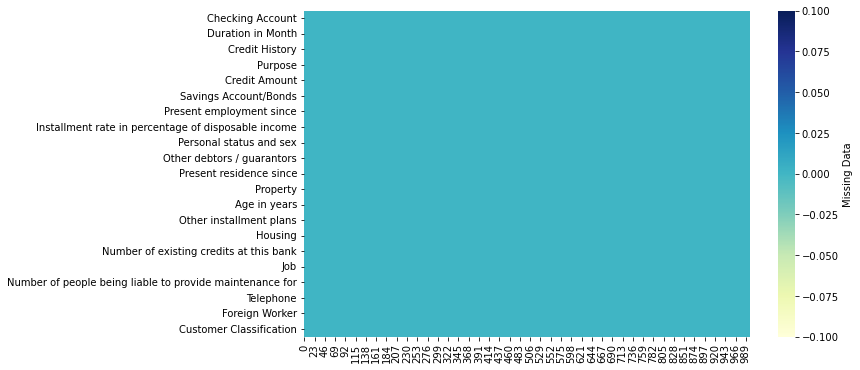

In [18]:
# heatmap for missing data visualization, this shows we have no missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})
plt.show()

In [19]:
# to check if there is any missing any value in each column
df.isnull().isna().any()

Checking Account                                            False
Duration in Month                                           False
Credit History                                              False
Purpose                                                     False
Credit Amount                                               False
Savings Account/Bonds                                       False
Present employment since                                    False
Installment rate in percentage of disposable income         False
Personal status and sex                                     False
Other debtors / guarantors                                  False
Present residence since                                     False
Property                                                    False
Age in years                                                False
Other installment plans                                     False
Housing                                                     False
Number of 

In [20]:
# printing columns which have null values
[col for col in df.columns if df[col].isnull().any()]

[]

# ``Outlier Detection``

### What is an Outlier?

- A data point which is significantly far from other data points
- Inter-Quartile Range Method to remove Outliers (IQR)
- IQR = Q3 - Q1
- Upper_Limit = Q3 + 1.5*IQR
- Lower_Limit = Q1 - 1.5*IQR

In [21]:
def plot_boxplot(dataframe,feature):
    red_circle = dict(markerfacecolor='red', marker='o')
    mean_shape = dict(markerfacecolor='green',marker='D',markeredgecolor='green')
    dataframe.boxplot(column=[feature],flierprops = red_circle,showmeans=True,meanprops=mean_shape,notch=True)
    plt.grid(False)
    plt.show()

# ```Plotting Individual Box Plots```

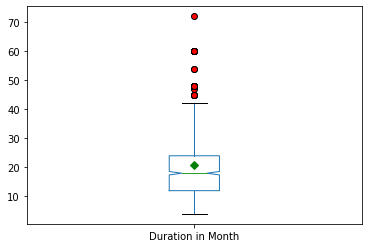

In [22]:
plot_boxplot(df,"Duration in Month")

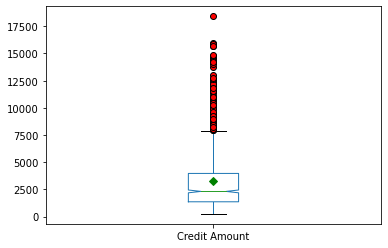

In [23]:
plot_boxplot(df,"Credit Amount")

## ```Plotting Box Plot for multiple features (before outlier removal)```

In [24]:
def plot_boxplot_multiple_features():
    red_circle = dict(markerfacecolor='red', marker='o')
    mean_shape = dict(markerfacecolor='green',marker='D',markeredgecolor='green')
    fig,axis = plt.subplots(1,len(df.select_dtypes(include='number').columns),figsize=(20,10))
    for i,ax in enumerate(axis.flat):
        ax.boxplot(df.select_dtypes(include='number').iloc[:,i],flierprops=red_circle,showmeans=True,meanprops=mean_shape,notch=True)
        ax.set_title(df.select_dtypes(include='number').columns[i][0:20]+"..",fontsize=15,fontweight=20)
        ax.tick_params(axis='y',labelsize=14)

    plt.tight_layout()

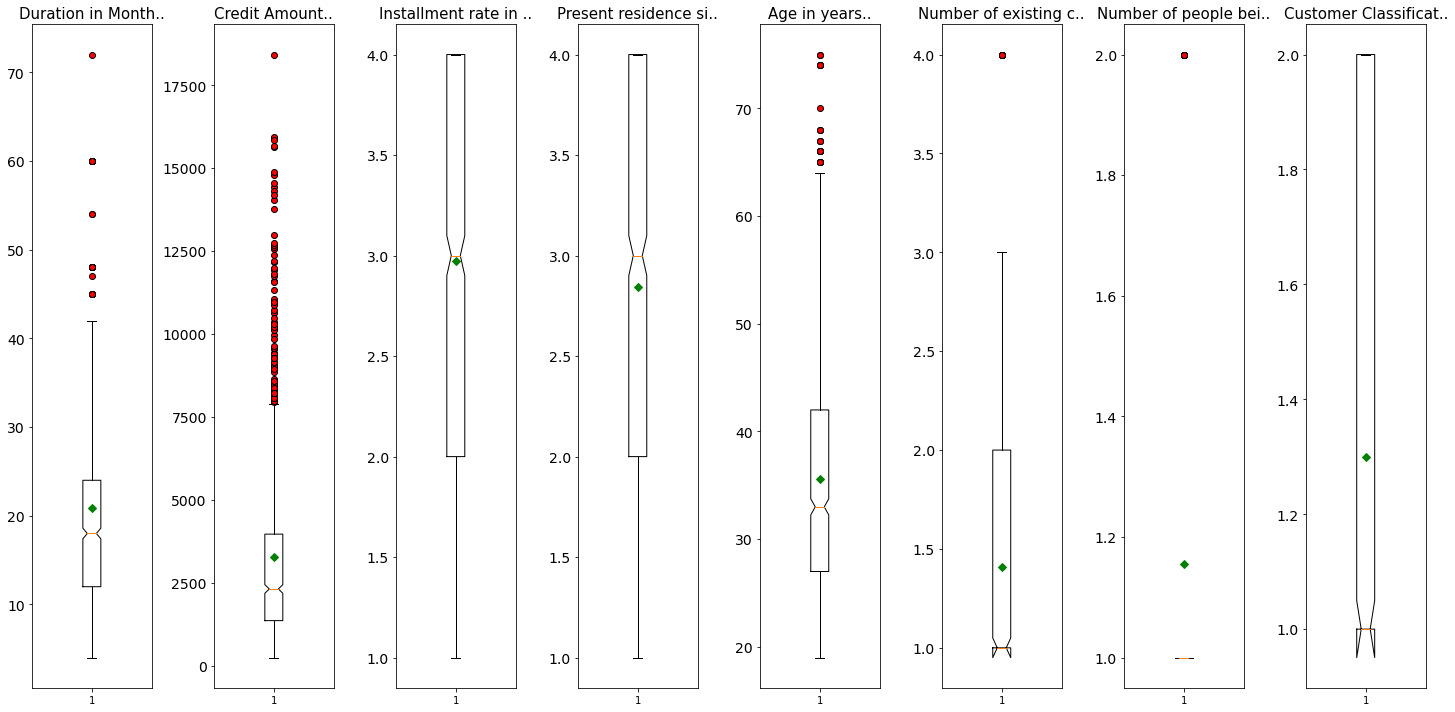

In [25]:
# red circles are the outliers 
plot_boxplot_multiple_features()

In [26]:
# function to return list of indices which are outliers for that feature
def find_outlier_IQR(dataframe,feature):
    q1 = dataframe[feature].quantile(0.25)
    q3 = dataframe[feature].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    outlier_indices = dataframe.index[(dataframe[feature] < lower_limit) | (dataframe[feature] > upper_limit)]
    return outlier_indices

In [27]:
# creating a list to store indices of outliers, for all features
outlier_index_list = []
feature_num_ppl_vector = []
feature_num_ppl_vector = df["Number of people being liable to provide maintenance for"]
df.drop(columns='Number of people being liable to provide maintenance for')
for feature in df.select_dtypes(include='number').columns:
    outlier_index_list.extend(find_outlier_IQR(df.select_dtypes(include='number'),feature))
df["Number of people being liable to provide maintenance for"] = feature_num_ppl_vector

In [28]:
# checking the outlier list
print(outlier_index_list[:10])

[1, 11, 29, 35, 36, 44, 63, 78, 95, 115]


In [29]:
# function to remove outliers and which will return a clean datafram without the outliers
def remove_outliers(dataframe,outlier_index_list):
    outlier_index_list = sorted(set(outlier_index_list)) # use a set to remove duplicate values of indices
    dataframe = dataframe.drop(outlier_index_list)
    return dataframe

In [30]:
df = remove_outliers(df,outlier_index_list)

In [31]:
# checking the len after outlier removal
print(len(df))

728


# ```Plotting Box Plot for multiple features (after outlier removal)```

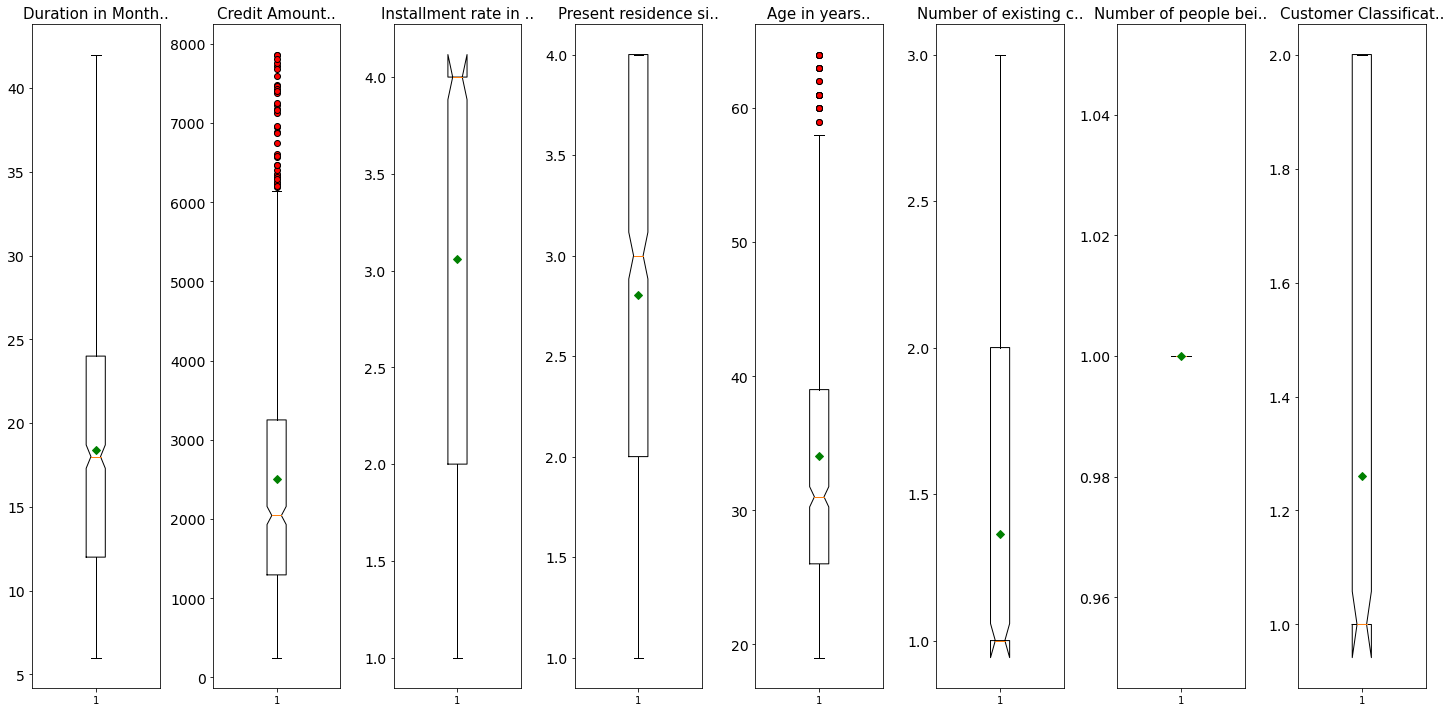

In [32]:
plot_boxplot_multiple_features() # we can observe the difference now

In [33]:
df.shape

(728, 21)

In [34]:
df.head()

,Checking Account,Duration in Month,Credit History,Purpose,Credit Amount,Savings Account/Bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign Worker,Customer Classification
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2
10,A12,12,A32,A40,1295,A61,A72,3,A92,A101,...,A123,25,A143,A151,1,A173,1,A191,A201,2


# ```Converting Categorical Variables```

#### Nominal Categorical Variables
   - Here, we don't have to worry about the order of categories
   - Methods used for encoding
        - One hot encoding
        - One hot encoding with many categorical variables
        - Mean encoding

#### Ordinal Categorical Variables
   - Here, order or rank of categories matter
   - Methods used for encoding
       - Label encoding
       - Target guided ordinal encoding

In [35]:
# replacing boolean values with 0 and 1
def replace_false_true(dataset):
    for column in dataset.columns:
        if dataset[column].dtype == bool:
            # If the column has boolean data type, replace 'False' with 0 and 'True' with 1
            dataset[column] = dataset[column].replace({False: 0, True: 1})
    return dataset

In [36]:
def updated_dataset(dataset):
    # Create a copy of the original dataset to avoid modifying it
    merged = dataset.copy()
    numeric_column = merged['Customer Classification'] 
    merged = merged.drop(['Customer Classification'],axis=1)
    for column in dataset.columns:
        if dataset[column].dtype == object:
            dummy_df = pd.get_dummies(dataset[column],prefix=column)
            merged = pd.concat([merged,dummy_df], axis='columns')
            merged = merged.drop([column], axis='columns')
    merged = merged.drop('Telephone_A191', axis=1)
    merged = merged.drop('Foreign Worker_A202', axis=1)
    merged = pd.concat([merged, numeric_column], axis='columns')
    replace_false_true(merged)
    return merged

In [37]:
df = updated_dataset(df)
df

,Duration in Month,Credit Amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Checking Account_A11,Checking Account_A12,Checking Account_A13,...,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A192,Foreign Worker_A201,Customer Classification
6,24,2835,3,4,53,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,1
7,36,6948,2,2,35,1,1,0,1,0,...,1,0,0,0,0,0,1,1,1,1
8,12,3059,2,4,61,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,1
9,30,5234,4,2,28,2,1,0,1,0,...,0,1,0,0,0,0,1,0,1,2
10,12,1295,3,1,25,1,1,0,1,0,...,1,0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,36,3959,4,3,30,1,1,1,0,0,...,0,1,0,0,0,0,1,1,1,1
994,12,2390,4,3,50,1,1,0,0,0,...,0,1,0,0,0,1,0,1,1,1
995,12,1736,3,4,31,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,1
996,30,3857,4,4,40,1,1,1,0,0,...,0,1,0,0,0,0,1,1,1,1


# `Train-Test Split`

In [38]:
def split_train_test(data,test_ratio):
    # np.random.seed() is very important as whenever we call the function it will randomly divide the indices
    # it might happen after many calls our model sees all the data and it leads to overfitting so to prevent it
    # seed function will randomly divide data only once and once the function is called it will not give other
    # permuatation of indices whenever called again,hence no overfitting
    np.random.seed(45)
    # it will give random permutation of indices from 0 to len(data)-1
    # now shuffled array will contain random number for eg [0,4,1,99,12,3...]
    shuffled = np.random.permutation(len(data))  
    test_set_size = int(len(data)*test_ratio)
    # it will give array of indices from index 0 to test_set_size-1
    test_indices = shuffled[:test_set_size]
    # it will give array of indices from index test_set_size till last
    train_indices = shuffled[test_set_size:]
    # it will return rows from data df corresponding to indices given in train and test indices array
    # so it is returning the train and test data respectively
    return data.iloc[train_indices], data.iloc[test_indices]

In [39]:
train_set, test_set = split_train_test(df,0.2)

In [40]:
train_set.head()

,Duration in Month,Credit Amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Checking Account_A11,Checking Account_A12,Checking Account_A13,...,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A192,Foreign Worker_A201,Customer Classification
199,18,4297,4,3,40,1,1,0,1,0,...,0,1,0,0,0,0,1,1,1,2
13,24,1199,4,4,60,2,1,1,0,0,...,0,1,0,0,1,0,0,0,1,2
233,18,866,4,2,25,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,1
201,12,1168,4,3,27,1,1,1,0,0,...,0,1,0,0,1,0,0,0,1,1
434,9,2136,3,2,25,1,1,1,0,0,...,0,1,0,0,0,1,0,0,1,1


In [41]:
len(train_set)

583

In [42]:
test_set.head()

,Duration in Month,Credit Amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Checking Account_A11,Checking Account_A12,Checking Account_A13,...,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A192,Foreign Worker_A201,Customer Classification
680,6,1538,1,2,56,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,1
882,30,2181,4,4,36,2,1,0,1,0,...,0,1,0,0,0,1,0,0,1,1
749,15,3029,2,2,33,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,1
897,12,1592,3,2,35,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
519,6,700,4,4,36,2,1,0,0,0,...,0,0,1,0,0,1,0,0,1,1


In [43]:
len(test_set)

145

# ```Handling Data Imbalance```

Methods to handle data imbalance are:
- Undersampling the majority class
- Oversampling the minority class (by duplicating items)
- Oversampling minority class (using SMOTE - Synthetic Minority Oversamping Technique, by K Nearest Neighbors algorithm)
- Ensemble Method 
- Focal Loss

#### SMOTE (Synthetic Minority Oversampling Technique)

- It aims to balance class distribution by randomly increasing minority class examples by replicating them.
- SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. 
- These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class.
- SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.


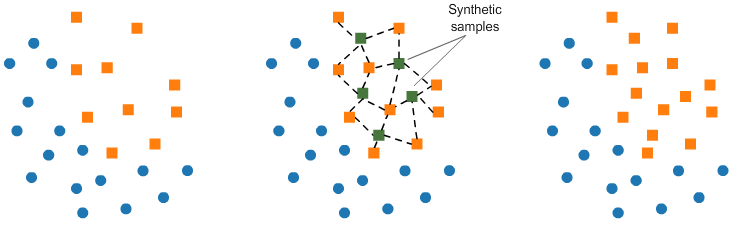

In [44]:
train_set["Customer Classification"].value_counts()

1    433
2    150
Name: Customer Classification, dtype: int64

# ```Imbalanced Train Data```

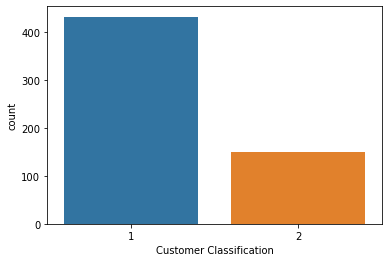

In [45]:
sns.countplot(x='Customer Classification',data = train_set)
plt.show()

In [46]:
pip install imblearn


[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [47]:
import collections
x = train_set.drop(columns='Customer Classification')
y = train_set["Customer Classification"]
counter = collections.Counter(y)
print(counter.items())

dict_items([(2, 150), (1, 433)])


In [48]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smt, y_smt = smote.fit_resample(x,y)
y_smt = pd.DataFrame(y_smt)

In [49]:
# updating the train_set, to a balanced train_set after using smote
train_set_smote = pd.concat([x_smt,y_smt],axis=1)
train_set = train_set_smote
print(len(train_set))

866


# ```Balanced Train Data```

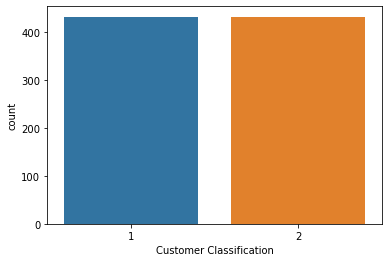

In [50]:
# now we have balanced train_set
sns.countplot(x='Customer Classification',data = train_set)
plt.show()

# ```Plotting Correlation Graphs for Strongly Related Features```

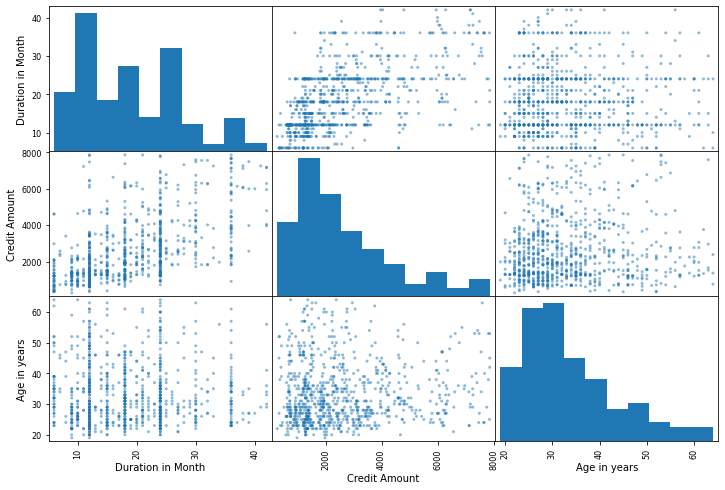

In [51]:
from pandas.plotting import scatter_matrix
attributes = ["Duration in Month","Credit Amount","Age in years"]
scatter_matrix(train_set[attributes],figsize=(12,8))
plt.show()

## ```Box Plots for checking correlation between numerical features and target```

- Box-plot interpretation, these plots gives us idea about distribution of numerical features for each of the classes in target variable, if the distribution looks similar that means the numerical feature has no effect on target variable, hence numerical feature is not correlated to target feature.


- We can see that for features "Installment rate in percentage of disposable income" and "Number of people being liable to provide maintenance for" rectangular boxes are in similar lines. It means whether the customer was good or bad is not effected by these features.


- We will find which all features to drop after performing ANOVA Test.

In [52]:
def make_box_plot(dataset,feature):    
    good_customer = dataset[dataset['Customer Classification'] == 1][feature]
    bad_customer = dataset[dataset['Customer Classification'] == 2][feature]
    fig = plt.figure(figsize =(7,6))
    fig, ax1 = plt.subplots(figsize=(7, 6))
    ax1.yaxis.grid(True, linestyle='-', which='major', color='grey',alpha=0.5)
    plt.boxplot([good_customer, bad_customer], labels=['Good Customer', 'Bad Customer'],vert=True)
    plt.ylabel(feature)
    plt.title(f"Boxplot of {feature} for Customer Classification")
    plt.show()

<Figure size 504x432 with 0 Axes>

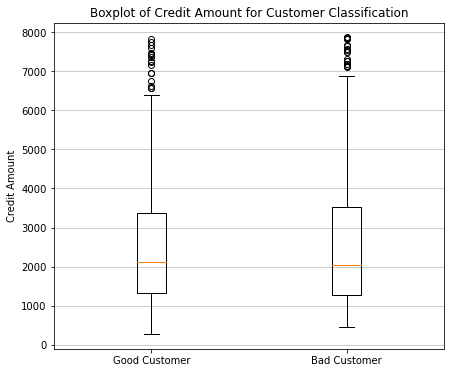

In [53]:
make_box_plot(train_set,"Credit Amount")

<Figure size 504x432 with 0 Axes>

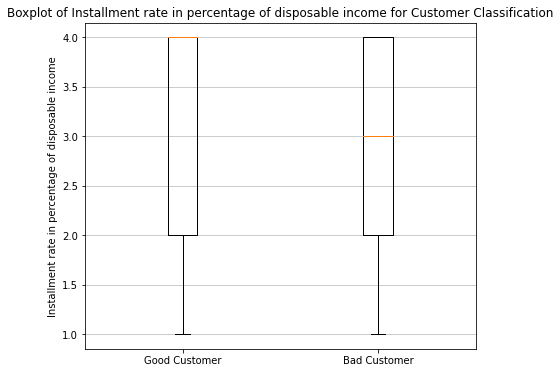

In [54]:
make_box_plot(train_set,"Installment rate in percentage of disposable income")

<Figure size 504x432 with 0 Axes>

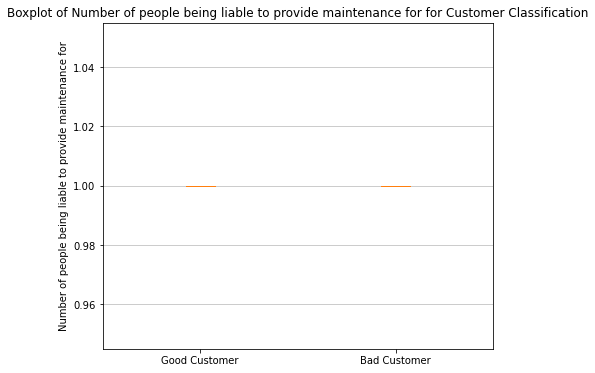

In [55]:
make_box_plot(train_set,"Number of people being liable to provide maintenance for")

<Figure size 504x432 with 0 Axes>

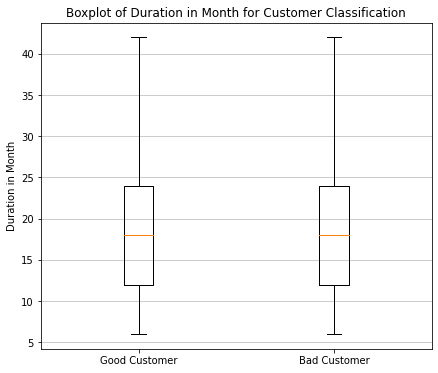

In [56]:
make_box_plot(train_set,"Duration in Month")

<Figure size 504x432 with 0 Axes>

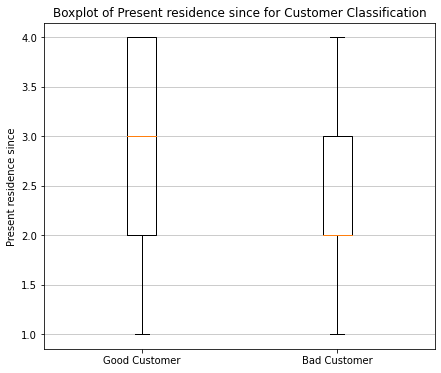

In [57]:
make_box_plot(train_set,"Present residence since")

<Figure size 504x432 with 0 Axes>

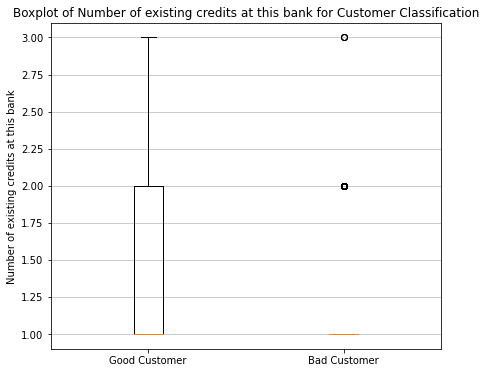

In [58]:
make_box_plot(train_set,"Number of existing credits at this bank")

<Figure size 504x432 with 0 Axes>

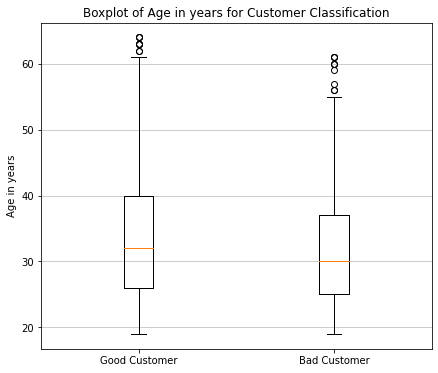

In [59]:
make_box_plot(train_set,"Age in years")

# ```Feature Selection```

Methods for feature selection

- ```ANOVA Test``` for numerical features

- ```Chi-Sqaured Test``` for categorical features

# ANOVA Test

ANOVA (Analysis of Variance) Test is used for feature selection when input variables are numerical and output variable is categorical.

The variance of a feature determines how much it is impacting the response variable. If the variance is low, it implies there is no impact of this feature on response and vice-versa.

F-Distribution is a probability distribution generally used for the analysis of variance.

H0: Two variances are equal

H1: Two variances are not equal

F-value is the ratio of two Chi-distributions divided by its degrees of Freedom.

\begin{equation}
\ F = (\chi^2_{1}/n_{1}-1) / (\chi^2_{2}/n_{2}-1)
\end{equation}

where $\chi^2_{1}$ and $\chi^2_{2}$ are chi distributions and $n_{1}$, $n_{2}$ are its respective degrees of freedom

Analysis of Variance is a statistical method, used to check the means of two or more groups that are significantly different from each other. It assumes Hypothesis as

H0: Means of all groups are equal (There is no relation between the given variables as the mean values of the numeric Predictor variable is same for all the groups in the categorical target variable)

H1: At least one mean of the groups are different (There is some relation between given variables)

```SST``` represents the total variation in the data. It is calculated as the sum of the squared differences between each data point and the overall mean of the data.

<center>SST $= \sum(y_{i} - 𝑦̄)^2 $ </center>

```SSB``` represents the variation between different groups or categories in your data. It is calculated as the sum of the squared differences between the group means and the overall mean, weighted by the number of data points in each group.

<br>
<center>SSB $= \sum(n_{j}(𝑦̄_{j} - 𝑦̄)^2) $ </center>

```SSE``` represents the variation within each group or category. It is calculated as the sum of the squared differences between individual data points and their respective group means.

<center> SSE $= \sum\sum((y_{ij} - 𝑦̄_{j})^2) $ </center>


In [60]:
# defining anova function
def anova_feature_selection(X,y):
    n_features = X.shape[1]
    f_scores = [] # intializing array to store f value for each feature
    
    unique_classes = np.unique(y)
    n_classes = len(unique_classes)
    
    # to find value of f score for each feature
    for i in range(n_features):
        # feature_values is a column vector
        feature_values = [X.iloc[j][i] for j in range(X.shape[0])]
        
        ssb = 0
        sse = 0
        
        for c in unique_classes:
            # it will take datapoints belonging to class c, lets say n_j points
            class_values = []
            for j in range(len(y)):
                if y[j] == c:
                    class_values.append(feature_values[j])
                    
            # calculating class mean for class c
            class_mean = np.mean(class_values)
            
            # class size as n_j
            class_size = len(class_values)
            
            sse += np.sum([(x-class_mean)**2 for x in class_values])
            ssb += class_size * (class_mean - np.mean(feature_values))**2
        
        # for handling the case when division is undefined 0/0 form
        if sse == 0:
            epsilon = 1e-6
            sse += epsilon
            
        f_scores.append((ssb/(n_classes-1))/(sse/(X.shape[0]-n_classes)))
    
    return f_scores


In [61]:
numerical_features = ["Duration in Month","Credit Amount","Installment rate in percentage of disposable income",
                      "Present residence since","Age in years","Number of existing credits at this bank","Number of people being liable to provide maintenance for"]

# making a dataframe containing only numerical features for ANOVA test
train_set_numerical = pd.DataFrame()
for feature in numerical_features:
    train_set_numerical[feature] = train_set[feature]
            
x = train_set_numerical
y = train_set["Customer Classification"]
print(train_set_numerical.shape)
print("Number of numerical features before applying ANOVA test is: ",len(train_set_numerical.columns))


(866, 7)
Number of numerical features before applying ANOVA test is:  7


In [62]:
# this will give f-score values for all features
f_scores = anova_feature_selection(x,y)
f_scores

[4.693614687806769,
 1.0817072208587106,
 1.6838002436053603,
 29.976250818691852,
 11.886909705995478,
 25.756499112950923,
 0.0]

In [63]:
import json
f_scores = pd.Series(f_scores,index=train_set_numerical.columns)
f_scores_dict = {}
for ind in range(len(f_scores)):
    f_scores_dict[train_set_numerical.columns[ind]] = f_scores[ind]
f_scores_dict = dict(sorted(f_scores_dict.items(), key = lambda x: x[1], reverse = True))
print(json.dumps(f_scores_dict, indent = 4))


{
    "Present residence since": 29.976250818691852,
    "Number of existing credits at this bank": 25.756499112950923,
    "Age in years": 11.886909705995478,
    "Duration in Month": 4.693614687806769,
    "Installment rate in percentage of disposable income": 1.6838002436053603,
    "Credit Amount": 1.0817072208587106,
    "Number of people being liable to provide maintenance for": 0.0
}


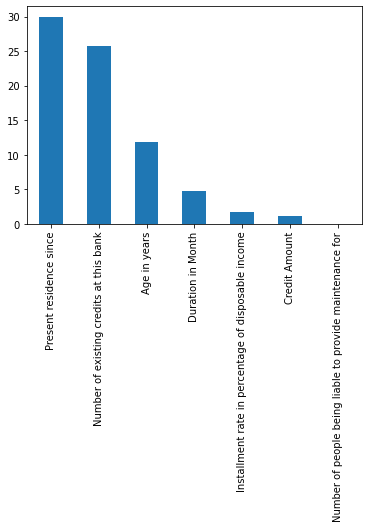

In [64]:
# plot showing f values for numerical features
f_scores.sort_values(ascending=False,inplace =True)
f_scores.plot.bar()
plt.show()


### According to ANOVA test we reject H0 if 

\begin{equation}
F_{\text{observed}}  \ge  F_{\text{critical}}
\end{equation}

where, 
\begin{equation}
F_{\text{critical}} \space\space  \text{is calculated by taking degree of freedom as k-1,n-k where k is the number of classes (k=2) at level of significance ${\alpha}$ = 0.05}
\end{equation}

\begin{equation}
F_{\text{critical}} \space\space  \text{comes out to be 3.8519}
\end{equation}

so for features where,

\begin{equation}
F_{\text{observed}} \space\space  \text{is greater than or equal to 3.8519 are included, rest of the features are dropped}
\end{equation}

In [65]:
# so features with high f values are included,
# and we drop features which have f values less than 3.8519
count_of_drop_features = 0
for f_val in f_scores:
    if f_val < 3.8519:
        count_of_drop_features += 1
        
print("Number of features that should be dropped are:",count_of_drop_features)


Number of features that should be dropped are: 3


In [66]:
num_features_included = len(f_scores) - count_of_drop_features
f_scores = f_scores[:num_features_included]
print("Number of numerical features remaining after applying f test are:",len(f_scores))


Number of numerical features remaining after applying f test are: 4


In [67]:
train_set_new = pd.DataFrame()

# including remaining numerical features
count = 0
for feature in f_scores_dict:
    if count == num_features_included:
        break
    train_set_new[feature] = train_set[feature]
    count += 1


# including all categorical features
for feature in train_set.columns:
    if numerical_features.count(feature) == 0:
        train_set_new[feature] = train_set[feature]

train_set = train_set_new
print(train_set.shape)
features_after_f_test = train_set.columns
features_after_f_test


(866, 57)


Index(['Present residence since', 'Number of existing credits at this bank',
       'Age in years', 'Duration in Month', 'Checking Account_A11',
       'Checking Account_A12', 'Checking Account_A13', 'Checking Account_A14',
       'Credit History_A30', 'Credit History_A31', 'Credit History_A32',
       'Credit History_A33', 'Credit History_A34', 'Purpose_A40',
       'Purpose_A41', 'Purpose_A410', 'Purpose_A42', 'Purpose_A43',
       'Purpose_A44', 'Purpose_A45', 'Purpose_A46', 'Purpose_A48',
       'Purpose_A49', 'Savings Account/Bonds_A61', 'Savings Account/Bonds_A62',
       'Savings Account/Bonds_A63', 'Savings Account/Bonds_A64',
       'Savings Account/Bonds_A65', 'Present employment since_A71',
       'Present employment since_A72', 'Present employment since_A73',
       'Present employment since_A74', 'Present employment since_A75',
       'Personal status and sex_A91', 'Personal status and sex_A92',
       'Personal status and sex_A93', 'Personal status and sex_A94',
       'O

In [68]:
train_set


,Present residence since,Number of existing credits at this bank,Age in years,Duration in Month,Checking Account_A11,Checking Account_A12,Checking Account_A13,Checking Account_A14,Credit History_A30,Credit History_A31,...,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A192,Foreign Worker_A201,Customer Classification
0,3,1,40,18,0,1,0,0,0,0,...,0,1,0,0,0,0,1,1,1,2
1,4,2,60,24,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,2
2,2,1,25,18,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,1
3,3,1,27,12,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,1
4,2,1,25,9,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,1,1,36,12,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,2
862,4,1,25,12,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,2
863,4,1,37,17,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,2
864,1,1,53,16,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,2


## Chi-Sqaured Test

### Hypothesis Testing

HO: The given feature and target variable are independent (This feature is not important)

H1: The given feature and target variable are not independent (The feature is important)

The formula for the chi-squared (χ²) statistic used in feature selection with categorical features and a categorical target variable is as follows:

\begin{equation}
\chi^2 = \sum \sum \frac{(O - E)^2}{E}
\end{equation}

Where:

- $\chi^2$ is the chi-squared statistic.
- $\sum$ represents the summation over all cells in the contingency table.
- O is the observed frequency in a specific cell of the contingency table.
- E is the expected frequency in the same cell under the assumption of independence between the feature and the target variable.


- This formula calculates the chi-squared statistic by summing the contributions from all cells in the contingency table, where each cell's contribution measures the difference between the observed and expected frequencies, normalized by the expected frequency.


- This statistic is used to assess the association between a categorical feature and a categorical target variable, which is valuable for feature selection in machine learning. Features with higher chi-squared values and significant associations with the target variable are often chosen for inclusion in the model.

In [69]:
def chi2(x,y):
    # Calculate contingency table for each feature
    contingency_tables = []
    
    # iterating over each feature
    for feature in x:
        
        # making the contingency table with 2 rows (as we have two possibilities for each feature 0 and 1)
        # and 2 columns as we have two classes
        contingency_table = np.zeros((int(x[feature].max()+1),int(len(np.unique(y)))))
                
                # initial configuration of matrix
                #     Class1    Class2
                #  0    0         0
                #  1    0         0

                                     
        # i will iterate over indexes, and category values will be 0 and 1
        for i, category in enumerate(x[feature]):
            # y[i]-1 as value of output features are 1 and 2 but indexes are 0 and 1
            contingency_table[int(category),int(y[i])-1] += 1
        contingency_tables.append(contingency_table)
        
                #     Class1    Class2
                #  0    10        20
                #  1    30        40

    # finding chi2 values for each feature
    chi2_values = []
    for table in contingency_tables:
        chi2 = 0
        for i in range(table.shape[0]):  # for every row
            for j in range(table.shape[1]): # for every column
                observed = table[i, j]
                # eij = (row i total * column j total) / (total)
                expected = (np.sum(table[i, :]) * np.sum(table[:, j])) / np.sum(table)
                chi2 += (observed - expected)**2 / expected
        chi2_values.append(chi2)
                                     
    return chi2_values

In [70]:
# finding chi^2 values for all categorical features
numerical_features = ["Duration in Month","Age in years","Present residence since",
                      "Number of existing credits at this bank","Customer Classification"]

# making a dataframe containing only categorical features for chi^2 test
train_set_categorical = pd.DataFrame()
for feature in train_set.columns:
    if numerical_features.count(feature) == 0:
        train_set_categorical[feature] = train_set[feature]
            
x = train_set_categorical
y = train_set["Customer Classification"]
print("Number of categorical features before applying chi-squared test is: ",len(train_set_categorical.columns))

Number of categorical features before applying chi-squared test is:  52


In [71]:
# this will give chi^2 values for all categorical features
chi_scores = chi2(x,y)
print(len(chi_scores))

52


In [72]:
import json
chi_scores = pd.Series(chi_scores,index=train_set_categorical.columns)
chi_scores_dict = {}
for ind in range(len(chi_scores)):
    chi_scores_dict[train_set_categorical.columns[ind]] = chi_scores[ind]
chi_scores_dict = dict(sorted(chi_scores_dict.items(), key = lambda x: x[1], reverse = True))
print(json.dumps(chi_scores_dict, indent = 4))

{
    "Checking Account_A14": 195.48058252427185,
    "Credit History_A34": 87.02577901800545,
    "Personal status and sex_A93": 71.88872670570787,
    "Present employment since_A75": 64.50353955063096,
    "Purpose_A43": 51.06841303685653,
    "Present employment since_A74": 49.24668407310705,
    "Purpose_A41": 48.25514632504816,
    "Other installment plans_A143": 41.306171424204216,
    "Property_A121": 37.63947717592898,
    "Checking Account_A11": 35.82027816555504,
    "Property_A123": 28.84939627977809,
    "Savings Account/Bonds_A65": 27.87481399058893,
    "Housing_A152": 26.655834600330948,
    "Savings Account/Bonds_A63": 25.803057079961555,
    "Savings Account/Bonds_A64": 25.440047961630697,
    "Job_A172": 24.075331442135123,
    "Personal status and sex_A94": 21.681003407239146,
    "Telephone_A192": 18.54819873865559,
    "Job_A173": 17.927541795321147,
    "Checking Account_A13": 16.78138467739435,
    "Job_A174": 15.523085279739272,
    "Present employment since_A73

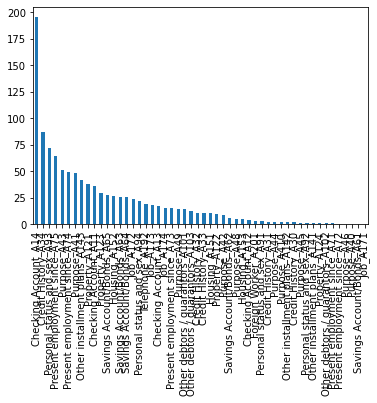

In [73]:
# plot showing chi-sqaured values for categorical features
chi_scores.sort_values(ascending=False,inplace =True)
chi_scores.plot.bar()
plt.show()

### According to Chi-Sqaured test we reject H0 if 

\begin{equation}
\chi^2_{\text{observed}} \ge \chi^2_{\text{critical}}
\end{equation}

where, 
\begin{equation}
\chi^2_{\text{critical}} \space\space  \text{is calculated by taking degree of freedom as (r-1) * (c-1) at level of significance ${\alpha}$ = 0.05}
\end{equation}

\begin{equation}
\chi^2_{\text{critical}} \space\space  \text{comes out to be 3.841}
\end{equation}

so for features where,

\begin{equation}
\chi^2_{\text{observed}} \space\space  \text{is greater than or equal to 3.841 are included, rest of the features are dropped}
\end{equation}

In [74]:
# so features with high chi-squared values are included,
# and we drop features which have chi-sqaured values less than or equal to 3.841
count_of_drop_features = 0
for chi_sqaure_val in chi_scores:
    if chi_sqaure_val < 3.841:
        count_of_drop_features += 1
        
print("Number of features that should be dropped are:",count_of_drop_features)

Number of features that should be dropped are: 18


In [75]:
num_features_included = len(chi_scores) - count_of_drop_features
chi_scores = chi_scores[:num_features_included]
print("Number of categorical features remaining after applying chi-sqaured test are:",len(chi_scores))

Number of categorical features remaining after applying chi-sqaured test are: 34


In [76]:
train_set_new = pd.DataFrame()

# including all numerical features
for feature in numerical_features:
    train_set_new[feature] = train_set[feature]
    
# including remaining categorical features
count = 0
for feature in chi_scores_dict:
    if count == num_features_included:
        break
    train_set_new[feature] = train_set[feature]
    count += 1

train_set = train_set_new
print(train_set.shape)
features_after_chi_sqaured_test = train_set.columns
features_after_chi_sqaured_test

(866, 39)


Index(['Duration in Month', 'Age in years', 'Present residence since',
       'Number of existing credits at this bank', 'Customer Classification',
       'Checking Account_A14', 'Credit History_A34',
       'Personal status and sex_A93', 'Present employment since_A75',
       'Purpose_A43', 'Present employment since_A74', 'Purpose_A41',
       'Other installment plans_A143', 'Property_A121', 'Checking Account_A11',
       'Property_A123', 'Savings Account/Bonds_A65', 'Housing_A152',
       'Savings Account/Bonds_A63', 'Savings Account/Bonds_A64', 'Job_A172',
       'Personal status and sex_A94', 'Telephone_A192', 'Job_A173',
       'Checking Account_A13', 'Job_A174', 'Present employment since_A73',
       'Purpose_A49', 'Other debtors / guarantors_A101',
       'Other debtors / guarantors_A103', 'Credit History_A32',
       'Credit History_A33', 'Housing_A151', 'Property_A122', 'Purpose_A42',
       'Savings Account/Bonds_A62', 'Purpose_A48', 'Housing_A153',
       'Checking Account_A

# ```Feature Scaling```

### Standardization Method
- Standardization is performed to transform the data to have a mean of 0 and standard deviation of 1
- Standardization is also known as Z-Score Normalization

\begin{equation}
z = \frac{(x-\mu)}{\sigma}
\end{equation}

In [77]:
# function for finding mean of a feature in a given dataset
def find_mean(dataset,feature):
    n = len(dataset[feature])
    sum = 0
    for val in dataset[feature]:
        sum += val
    return sum/n

In [78]:
# function for finding standard deviation of a feature in a given dataset
def find_standard_deviation(dataset,feature):
    variance, squared_sum = 0,0
    n = len(dataset[feature])
    mean = find_mean(dataset,feature)
    for val in dataset[feature]:
        squared_sum += (val-mean)**2
    variance = squared_sum/n
    return math.sqrt(variance)

In [79]:
# function for scaling a feature in given dataset
def standardize_feature(dataset,feature,mean_value,standard_deviation_value):
    # to check if mean and standard deviation values are given incase of test dataset or have to be calculated for train dataset
    if mean_value == -1:
        mean_value = find_mean(dataset,feature)
    if standard_deviation_value == -1:
        standard_deviation_value = find_standard_deviation(dataset,feature)

    standardized_feature = []
    for val in dataset[feature]:
        standardized_feature.append((val-mean_value)/standard_deviation_value)
    return standardized_feature, mean_value, standard_deviation_value

In [80]:
# function for scaling (standardizing) the whole dataset
def standardize_dataset(dataset,mean_array,standard_deviation_array):
    standardized_df = pd.DataFrame()
    mean_calculated = []
    standard_deviation_calculated = []
    for ind in range(len(dataset.columns)):
        standardized_result, m, sd = standardize_feature(dataset,dataset.columns[ind],mean_array[ind],standard_deviation_array[ind])
        standardized_df[dataset.columns[ind]] = standardized_result
        mean_calculated.append(m)
        standard_deviation_calculated.append(sd)
    return standardized_df, mean_calculated, standard_deviation_calculated

# ```Plot showing distribution of features before standardization```

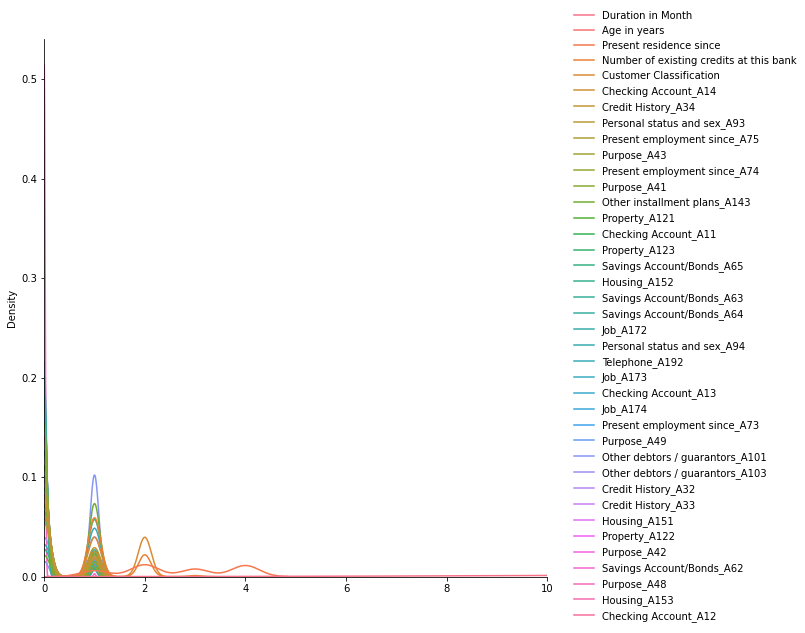

In [81]:
x_axis_limits = (0,10)
sns.displot(train_set.select_dtypes(include='number'), kind='kde',aspect=1,height=8,warn_singular=False,facet_kws={'xlim': x_axis_limits})
plt.show()

# ```Standardizing the train dataset```

In [82]:
# standardizing the train dataset
train_set_new = train_set.select_dtypes(include='number')
train_set_new = train_set_new.drop(columns = ['Customer Classification'])
train_mean_array = [-1 for i in range(len(train_set_new.columns))]
train_standard_deviation_array = [-1 for i in range(len(train_set_new.columns))]
train_set_new, mean_calculated, standard_deviation_calculated = standardize_dataset(train_set_new,train_mean_array,train_standard_deviation_array)
train_set_new

,Duration in Month,Age in years,Present residence since,Number of existing credits at this bank,Checking Account_A14,Credit History_A34,Personal status and sex_A93,Present employment since_A75,Purpose_A43,Present employment since_A74,...,Other debtors / guarantors_A103,Credit History_A32,Credit History_A33,Housing_A151,Property_A122,Purpose_A42,Savings Account/Bonds_A62,Purpose_A48,Housing_A153,Checking Account_A12
0,-0.085178,0.664808,0.324468,-0.606275,-0.633478,-0.501443,-0.733613,2.239171,-0.540867,-0.361315,...,-0.182792,-1.006953,4.544227,-0.41072,-0.479702,2.258006,-0.280100,-0.076205,-0.211263,2.008702
1,0.636817,2.684536,1.251826,1.468960,-0.633478,1.994245,1.363116,2.239171,-0.540867,-0.361315,...,-0.182792,-1.006953,-0.220059,-0.41072,-0.479702,-0.442869,-0.280100,-0.076205,-0.211263,-0.497834
2,-0.085178,-0.849988,-0.602890,-0.606275,-0.633478,-0.501443,-0.733613,-0.446594,1.848883,-0.361315,...,5.470701,0.993095,-0.220059,-0.41072,-0.479702,-0.442869,-0.280100,-0.076205,-0.211263,2.008702
3,-0.807172,-0.648015,0.324468,-0.606275,-0.633478,-0.501443,-0.733613,-0.446594,-0.540867,-0.361315,...,-0.182792,0.993095,-0.220059,-0.41072,-0.479702,-0.442869,-0.280100,-0.076205,-0.211263,-0.497834
4,-1.168169,-0.849988,-0.602890,-0.606275,-0.633478,-0.501443,1.363116,-0.446594,-0.540867,-0.361315,...,-0.182792,0.993095,-0.220059,-0.41072,-0.479702,2.258006,-0.280100,-0.076205,-0.211263,-0.497834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,-0.807172,0.260862,-1.530248,-0.606275,-0.633478,-0.501443,-0.733613,-0.446594,-0.540867,-0.361315,...,-0.182792,-1.006953,-0.220059,-0.41072,-0.479702,-0.442869,-0.280100,-0.076205,-0.211263,-0.497834
862,-0.807172,-0.849988,1.251826,-0.606275,-0.633478,-0.501443,-0.733613,-0.446594,-0.540867,-0.361315,...,-0.182792,-1.006953,-0.220059,-0.41072,-0.479702,-0.442869,-0.280100,-0.076205,-0.211263,-0.497834
863,-0.205510,0.361848,1.251826,-0.606275,-0.633478,-0.501443,-0.733613,-0.446594,-0.540867,-0.361315,...,-0.182792,-1.006953,-0.220059,-0.41072,-0.479702,-0.442869,-0.280100,-0.076205,-0.211263,-0.497834
864,-0.325842,1.977631,-1.530248,-0.606275,-0.633478,-0.501443,-0.733613,-0.446594,-0.540867,-0.361315,...,-0.182792,-1.006953,-0.220059,-0.41072,-0.479702,-0.442869,-0.280100,-0.076205,-0.211263,-0.497834


In [83]:
# checking mean and variance of each feature after standardizing the train dataset
for feature in train_set_new:
    print("Mean of",feature,"is",round(find_mean(train_set_new,feature)))
    print("Standard Deviation of",feature,"is",round(find_standard_deviation(train_set_new,feature)))

Mean of Duration in Month is 0
Standard Deviation of Duration in Month is 1
Mean of Age in years is 0
Standard Deviation of Age in years is 1
Mean of Present residence since is 0
Standard Deviation of Present residence since is 1
Mean of Number of existing credits at this bank is 0
Standard Deviation of Number of existing credits at this bank is 1
Mean of Checking Account_A14 is 0
Standard Deviation of Checking Account_A14 is 1
Mean of Credit History_A34 is 0
Standard Deviation of Credit History_A34 is 1
Mean of Personal status and sex_A93 is 0
Standard Deviation of Personal status and sex_A93 is 1
Mean of Present employment since_A75 is 0
Standard Deviation of Present employment since_A75 is 1
Mean of Purpose_A43 is 0
Standard Deviation of Purpose_A43 is 1
Mean of Present employment since_A74 is 0
Standard Deviation of Present employment since_A74 is 1
Mean of Purpose_A41 is 0
Standard Deviation of Purpose_A41 is 1
Mean of Other installment plans_A143 is 0
Standard Deviation of Other 

# ```Plot showing distribution of features after standardization```

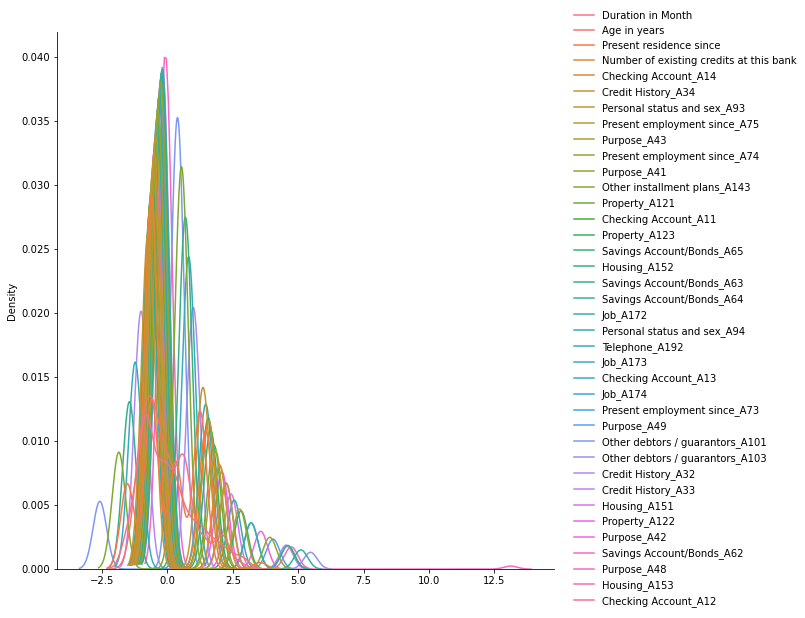

In [84]:
# all features following a normal distribution with mean 0 and standard deviation of 1
sns.displot(train_set_new, kind='kde',aspect=1,height=8)
plt.show()

In [85]:
# replacing standardized features with original features in train_set dataframe
train_set_new.index = train_set.index
train_set_new["Customer Classification"] = train_set["Customer Classification"]
train_set = train_set_new
train_set

,Duration in Month,Age in years,Present residence since,Number of existing credits at this bank,Checking Account_A14,Credit History_A34,Personal status and sex_A93,Present employment since_A75,Purpose_A43,Present employment since_A74,...,Credit History_A32,Credit History_A33,Housing_A151,Property_A122,Purpose_A42,Savings Account/Bonds_A62,Purpose_A48,Housing_A153,Checking Account_A12,Customer Classification
0,-0.085178,0.664808,0.324468,-0.606275,-0.633478,-0.501443,-0.733613,2.239171,-0.540867,-0.361315,...,-1.006953,4.544227,-0.41072,-0.479702,2.258006,-0.280100,-0.076205,-0.211263,2.008702,2
1,0.636817,2.684536,1.251826,1.468960,-0.633478,1.994245,1.363116,2.239171,-0.540867,-0.361315,...,-1.006953,-0.220059,-0.41072,-0.479702,-0.442869,-0.280100,-0.076205,-0.211263,-0.497834,2
2,-0.085178,-0.849988,-0.602890,-0.606275,-0.633478,-0.501443,-0.733613,-0.446594,1.848883,-0.361315,...,0.993095,-0.220059,-0.41072,-0.479702,-0.442869,-0.280100,-0.076205,-0.211263,2.008702,1
3,-0.807172,-0.648015,0.324468,-0.606275,-0.633478,-0.501443,-0.733613,-0.446594,-0.540867,-0.361315,...,0.993095,-0.220059,-0.41072,-0.479702,-0.442869,-0.280100,-0.076205,-0.211263,-0.497834,1
4,-1.168169,-0.849988,-0.602890,-0.606275,-0.633478,-0.501443,1.363116,-0.446594,-0.540867,-0.361315,...,0.993095,-0.220059,-0.41072,-0.479702,2.258006,-0.280100,-0.076205,-0.211263,-0.497834,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,-0.807172,0.260862,-1.530248,-0.606275,-0.633478,-0.501443,-0.733613,-0.446594,-0.540867,-0.361315,...,-1.006953,-0.220059,-0.41072,-0.479702,-0.442869,-0.280100,-0.076205,-0.211263,-0.497834,2
862,-0.807172,-0.849988,1.251826,-0.606275,-0.633478,-0.501443,-0.733613,-0.446594,-0.540867,-0.361315,...,-1.006953,-0.220059,-0.41072,-0.479702,-0.442869,-0.280100,-0.076205,-0.211263,-0.497834,2
863,-0.205510,0.361848,1.251826,-0.606275,-0.633478,-0.501443,-0.733613,-0.446594,-0.540867,-0.361315,...,-1.006953,-0.220059,-0.41072,-0.479702,-0.442869,-0.280100,-0.076205,-0.211263,-0.497834,2
864,-0.325842,1.977631,-1.530248,-0.606275,-0.633478,-0.501443,-0.733613,-0.446594,-0.540867,-0.361315,...,-1.006953,-0.220059,-0.41072,-0.479702,-0.442869,-0.280100,-0.076205,-0.211263,-0.497834,2


## ```Dimensionality Reduction using PCA (Principal Component Analysis)```

- It is used to reduce the dimensionality of dataset by transforming a large set into a lower dimensional set that still contains most of the information of the large dataset

- Principal component analysis (PCA) is a technique that transforms a dataset of many features into principal components that "summarize" the variance that underlies the data

- PCA finds a new set of dimensions such that all dimensions are orthogonal and hence linearly independent and ranked according to variance of data along them

- Eigen vectors point in direction of maximum variance among data, and eigen value gives the importance of that eigen vector

![PCA_Image](https://miro.medium.com/v2/resize:fit:1192/format:webp/1*QinDfRawRskupf4mU5bYSA.png)

In [86]:
# implementing PCA from scratch

# it will take dataset X and k components needed after PCA
def PCA(X,k):
    k_principal_components = [] # it will store first k eigen vectors
    mean = np.mean(X,axis=0)  # this will find mean for each row
    X = X - mean  # mean centering the data
    
    # finding the covariance matrix, will give a n*n matrix containing covariance of all features
    cov = np.cov(X.T)
    
    # finding eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    
    # transpose eigenvector
    eigenvectors = eigenvectors.T
    
    # will give indexes according to eigen values, sorted in decreasing order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[idx]
    
    # for finding how much variance does each principal component capture
    explained_variance = eigenvalues / np.sum(eigenvalues)
    
    # slicing first k eigenvectors
    k_principal_components = eigenvectors[:k]
     
    # returning the transformed features
    # multiplyinh n*d matrix with d*k matrix to get transformed feature matrix of dimension n*k
    return np.dot(X,k_principal_components.T), explained_variance, k_principal_components

k = 30

# this will return the new dataset
train_set_pca, explained_variance, k_principal_components = PCA(train_set.drop(columns="Customer Classification"),k)
train_set_pca = pd.DataFrame(train_set_pca)
print("Shape of train_set is:", train_set.shape)
print("Shape of train_set_pca is:",train_set_pca.shape)

Shape of train_set is: (866, 39)
Shape of train_set_pca is: (866, 30)


In [87]:
train_set_pca

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.641128,-1.212240,0.726244,0.056952,2.208422,-2.345436,0.812714,0.011819,0.522357,-1.934971,...,1.551032,1.041335,-0.127131,-0.977652,-1.002330,0.140769,0.593560,-0.489599,-0.155007,-0.508239
1,2.824001,-0.557045,2.107261,-0.650907,-1.052120,-1.752772,-1.749383,-0.436702,-0.717240,1.731851,...,-0.366047,0.087330,-0.116145,-0.003168,-0.866029,-0.304285,-1.153897,0.415240,0.356235,0.675420
2,-2.811319,4.873104,0.520489,-2.149887,-0.815880,-2.579008,3.141731,2.104128,2.266271,1.777550,...,0.120834,-0.900491,-0.817062,0.203403,0.091297,-1.340348,0.026469,-0.472603,-0.064048,0.306704
3,-2.454237,2.220026,-0.426333,-1.563634,0.012223,-1.583711,-1.255072,-1.490642,0.375235,0.609197,...,-0.733490,-1.008959,0.114071,-0.264261,-0.915306,-0.612560,0.364570,-0.024196,1.010939,-0.061017
4,-1.938734,0.872249,-0.374333,0.080736,-1.620026,0.711243,-1.299226,-1.368349,1.842743,-1.409234,...,-0.272653,0.021732,0.926895,-0.718156,0.522114,0.882334,0.211456,0.170588,0.399828,-0.085740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,-1.740350,-0.634986,1.821886,1.429143,-0.191484,0.587778,-0.230990,-0.501284,-0.964481,-0.050540,...,-0.684253,-0.271940,1.390431,0.018075,0.415311,-0.020553,-0.343880,0.309414,-0.890292,0.033258
862,-1.386713,-0.559317,-0.085969,-0.504642,-0.041664,1.308251,0.408851,-0.953518,-0.342475,-0.466195,...,-0.245613,0.508389,-0.527844,0.614903,-0.908908,0.384206,1.050619,-0.456421,0.289909,0.254260
863,-0.479557,-1.259425,-0.347044,-0.435567,-0.637534,0.577031,0.318566,0.359358,-1.778236,-0.432692,...,-0.196805,0.390299,-0.174320,0.198787,-1.681165,0.028817,0.624901,0.726931,-0.291050,-0.635503
864,-0.360261,-0.805774,1.897344,1.556798,0.683772,-1.023110,0.585641,-0.802344,-0.781473,0.080322,...,0.282309,-0.320236,1.543283,0.406453,-0.857791,0.525291,-1.501881,-0.364539,-0.381653,0.150897


In [88]:
# plotting first two principal components
PC1 = train_set_pca[0]
PC2 = train_set_pca[1]

target = train_set["Customer Classification"]
label = ["Good Customer","Bad Customer"]

labels = []
for points in target:
    labels.append(label[points-1])
    
zipped = list(zip(PC1,PC2,target,labels))
pc_df = pd.DataFrame(zipped, columns=['PC1','PC2','Target','Label'])
pc_df

,PC1,PC2,Target,Label
0,1.641128,-1.212240,2,Bad Customer
1,2.824001,-0.557045,2,Bad Customer
2,-2.811319,4.873104,1,Good Customer
3,-2.454237,2.220026,1,Good Customer
4,-1.938734,0.872249,1,Good Customer
...,...,...,...,...
861,-1.740350,-0.634986,2,Bad Customer
862,-1.386713,-0.559317,2,Bad Customer
863,-0.479557,-1.259425,2,Bad Customer
864,-0.360261,-0.805774,2,Bad Customer


## ```Plot showing spread of data along first 2 Principal Components```

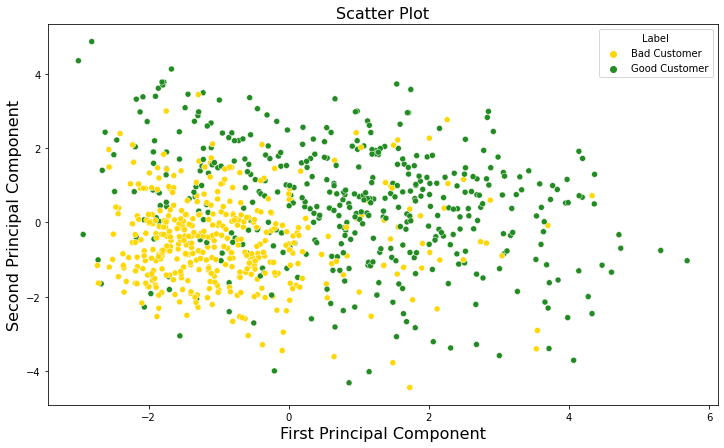

In [89]:
plt.figure(figsize=(12,7))
forest_green = (34/255, 139/255, 34/255)
gold = (255/255,215/255,0/255)
colors = [forest_green if label == 0 else gold for label in target]
sns.scatterplot(data=pc_df,x="PC1",y="PC2",hue="Label",palette={'Good Customer':forest_green,'Bad Customer':gold})
plt.title("Scatter Plot",fontsize=16)
plt.xlabel('First Principal Component',fontsize=16)
plt.ylabel('Second Principal Component',fontsize=16)
plt.show()

## ```Plot showing spread of data along first 3 Principal Components```

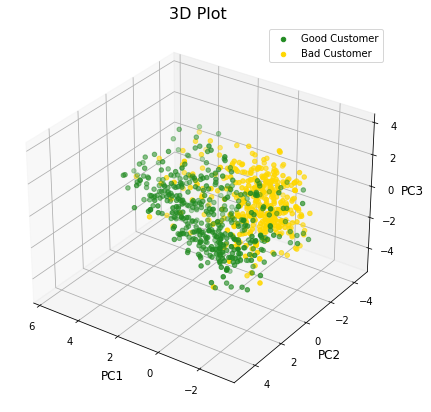

In [90]:
PC3 = train_set_pca[2]

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111,projection='3d')
 
for l in np.unique(target):
    ix=np.where(target==l)
    ix = np.asarray(ix)[0]
    ax.scatter(PC1[ix],PC2[ix],PC3[ix],label=label[l-1],c=[forest_green if l == 1 else gold])

ax.set_xlabel("PC1",fontsize=12)
ax.set_ylabel("PC2",fontsize=12)
ax.set_zlabel("PC3",fontsize=12)
 
ax.view_init(30, 125)
ax.legend()
plt.title("3D Plot",fontsize=16)
plt.show()

## ```Plot showing variance captured by each Principal Component```

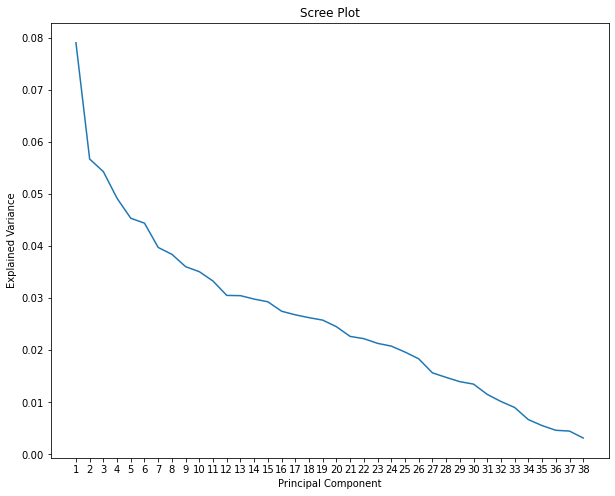

In [91]:
num_components = len(explained_variance)
components = np.arange(1, num_components + 1)
plt.figure(figsize=(10, 8))
plt.plot(components, explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.xticks(components)
plt.show()

## ```Plot to find out number of Principal Components needed inorder to capture 95% variance in data```

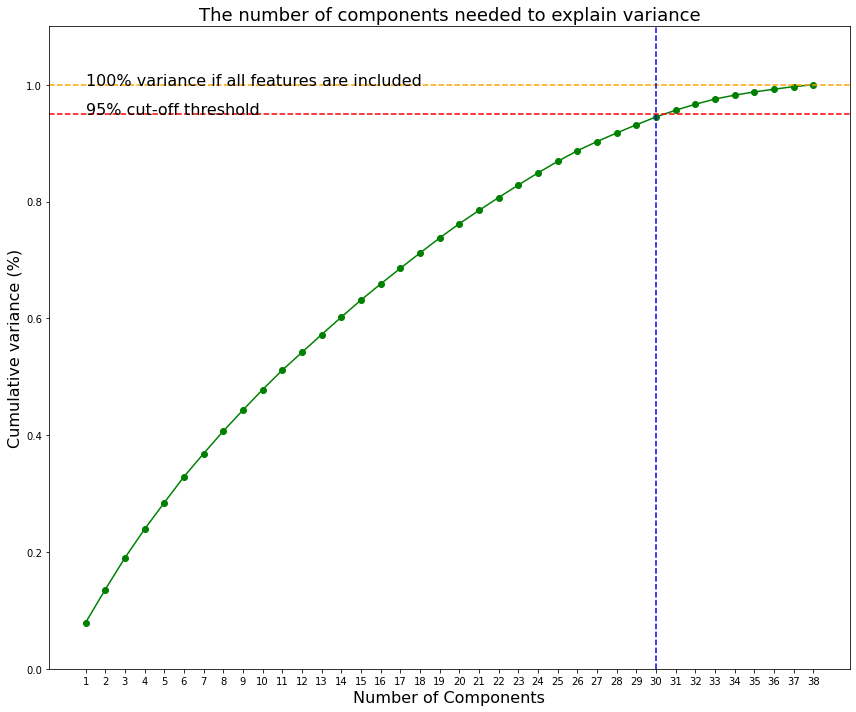

In [92]:
# finding cumulative variance captured by principal components
y_var = np.cumsum(explained_variance)

plt.figure(figsize=(12,10))
plt.ylim(0.0,1.1)
plt.plot(components, y_var, marker='o', linestyle='-', color='green')

plt.xlabel('Number of Components',fontsize=16)
plt.ylabel('Cumulative variance (%)',fontsize=16)
plt.title('The number of components needed to explain variance',fontsize=18)
plt.xticks(components) 

plt.axhline(y=0.95, color='red', linestyle='--')
plt.axhline(y=1.00, color='orange', linestyle='--')
plt.axvline(x=30.00, color='blue', linestyle='--')
plt.text(1, 0.95, '95% cut-off threshold', color = 'black', fontsize=16)
plt.text(1, 1, '100% variance if all features are included', color = 'black', fontsize=16)

plt.tight_layout()
plt.show()

In [93]:
# therefore for capturing 95% of variance in dataset we should take first 23 principal components
# adding the output or target attribute to train_set
train_set_pca["Customer Classification"] = train_set["Customer Classification"]
train_set_pca
train_set = train_set_pca
train_set.shape

(866, 31)

In [94]:
train_set

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Customer Classification
0,1.641128,-1.212240,0.726244,0.056952,2.208422,-2.345436,0.812714,0.011819,0.522357,-1.934971,...,1.041335,-0.127131,-0.977652,-1.002330,0.140769,0.593560,-0.489599,-0.155007,-0.508239,2
1,2.824001,-0.557045,2.107261,-0.650907,-1.052120,-1.752772,-1.749383,-0.436702,-0.717240,1.731851,...,0.087330,-0.116145,-0.003168,-0.866029,-0.304285,-1.153897,0.415240,0.356235,0.675420,2
2,-2.811319,4.873104,0.520489,-2.149887,-0.815880,-2.579008,3.141731,2.104128,2.266271,1.777550,...,-0.900491,-0.817062,0.203403,0.091297,-1.340348,0.026469,-0.472603,-0.064048,0.306704,1
3,-2.454237,2.220026,-0.426333,-1.563634,0.012223,-1.583711,-1.255072,-1.490642,0.375235,0.609197,...,-1.008959,0.114071,-0.264261,-0.915306,-0.612560,0.364570,-0.024196,1.010939,-0.061017,1
4,-1.938734,0.872249,-0.374333,0.080736,-1.620026,0.711243,-1.299226,-1.368349,1.842743,-1.409234,...,0.021732,0.926895,-0.718156,0.522114,0.882334,0.211456,0.170588,0.399828,-0.085740,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,-1.740350,-0.634986,1.821886,1.429143,-0.191484,0.587778,-0.230990,-0.501284,-0.964481,-0.050540,...,-0.271940,1.390431,0.018075,0.415311,-0.020553,-0.343880,0.309414,-0.890292,0.033258,2
862,-1.386713,-0.559317,-0.085969,-0.504642,-0.041664,1.308251,0.408851,-0.953518,-0.342475,-0.466195,...,0.508389,-0.527844,0.614903,-0.908908,0.384206,1.050619,-0.456421,0.289909,0.254260,2
863,-0.479557,-1.259425,-0.347044,-0.435567,-0.637534,0.577031,0.318566,0.359358,-1.778236,-0.432692,...,0.390299,-0.174320,0.198787,-1.681165,0.028817,0.624901,0.726931,-0.291050,-0.635503,2
864,-0.360261,-0.805774,1.897344,1.556798,0.683772,-1.023110,0.585641,-0.802344,-0.781473,0.080322,...,-0.320236,1.543283,0.406453,-0.857791,0.525291,-1.501881,-0.364539,-0.381653,0.150897,2


## ```Correlation Matrix for Train Dataset```

- We can see that we have transformed our train dataset into unrelated components by using PCA, as correlation between new features is almost 0

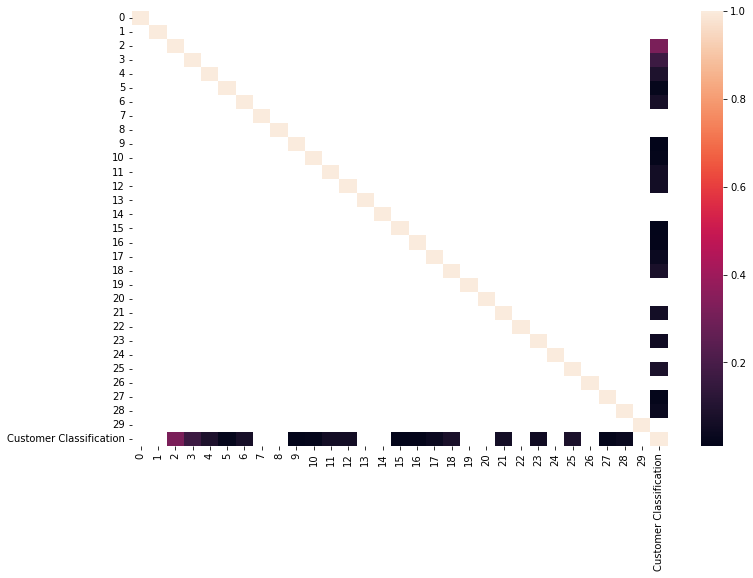

In [95]:
corr = train_set.corr()
plt.subplots(figsize=(12,8))
corr_new = corr[corr>=0.00001]
sns.heatmap(corr_new)
plt.show()

# ```Modifying Test Data```

In [96]:
# original test dataset
test_set

,Duration in Month,Credit Amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Checking Account_A11,Checking Account_A12,Checking Account_A13,...,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A192,Foreign Worker_A201,Customer Classification
680,6,1538,1,2,56,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,1
882,30,2181,4,4,36,2,1,0,1,0,...,0,1,0,0,0,1,0,0,1,1
749,15,3029,2,2,33,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,1
897,12,1592,3,2,35,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
519,6,700,4,4,36,2,1,0,0,0,...,0,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,24,1355,3,4,25,1,1,0,1,0,...,0,1,0,0,1,0,0,1,1,2
577,24,1927,3,2,33,2,1,0,0,0,...,0,1,0,0,0,1,0,1,1,1
335,6,3384,1,4,44,1,1,1,0,0,...,1,0,0,0,0,0,1,1,1,2
448,12,1424,3,4,55,1,1,0,0,1,...,0,1,0,0,0,0,1,1,1,1


## ```Transforming test data into same feature space as train data```

In [97]:
# removing features, which were eliminated after chi-sqaured test
print(features_after_chi_sqaured_test)

Index(['Duration in Month', 'Age in years', 'Present residence since',
       'Number of existing credits at this bank', 'Customer Classification',
       'Checking Account_A14', 'Credit History_A34',
       'Personal status and sex_A93', 'Present employment since_A75',
       'Purpose_A43', 'Present employment since_A74', 'Purpose_A41',
       'Other installment plans_A143', 'Property_A121', 'Checking Account_A11',
       'Property_A123', 'Savings Account/Bonds_A65', 'Housing_A152',
       'Savings Account/Bonds_A63', 'Savings Account/Bonds_A64', 'Job_A172',
       'Personal status and sex_A94', 'Telephone_A192', 'Job_A173',
       'Checking Account_A13', 'Job_A174', 'Present employment since_A73',
       'Purpose_A49', 'Other debtors / guarantors_A101',
       'Other debtors / guarantors_A103', 'Credit History_A32',
       'Credit History_A33', 'Housing_A151', 'Property_A122', 'Purpose_A42',
       'Savings Account/Bonds_A62', 'Purpose_A48', 'Housing_A153',
       'Checking Account_A

In [98]:
# remove features other than those left after chi-sqaured test
test_set_new = pd.DataFrame()
for feature in features_after_chi_sqaured_test:
    test_set_new[feature] = test_set[feature]
test_set = test_set_new
test_set

,Duration in Month,Age in years,Present residence since,Number of existing credits at this bank,Customer Classification,Checking Account_A14,Credit History_A34,Personal status and sex_A93,Present employment since_A75,Purpose_A43,...,Other debtors / guarantors_A103,Credit History_A32,Credit History_A33,Housing_A151,Property_A122,Purpose_A42,Savings Account/Bonds_A62,Purpose_A48,Housing_A153,Checking Account_A12
680,6,56,2,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
882,30,36,4,2,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
749,15,33,2,1,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
897,12,35,2,1,1,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
519,6,36,4,2,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,24,25,4,1,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
577,24,33,2,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
335,6,44,4,1,2,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
448,12,55,4,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


# ```Feature Scaling for Test Data```

# ```Plot showing distribution of features before standardization```

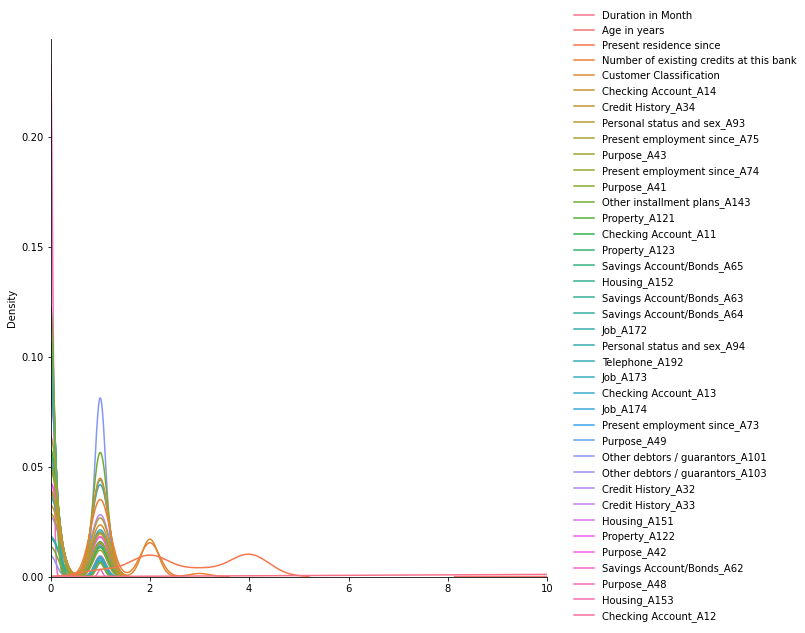

In [99]:
x_axis_limits = (0,10)
sns.displot(test_set.select_dtypes(include='number'), kind='kde',aspect=1,height=8,warn_singular=False,facet_kws={'xlim': x_axis_limits})
plt.show()

# ```Standardizing the test dataset```

In [100]:
# standardizing the test dataset
test_set_new = test_set.select_dtypes(include='number')
test_set_new = test_set_new.drop(columns = ['Customer Classification'])
test_set_new, mean_calculated, standard_deviation_calculated = standardize_dataset(test_set_new,mean_calculated,standard_deviation_calculated)
test_set_new

,Duration in Month,Age in years,Present residence since,Number of existing credits at this bank,Checking Account_A14,Credit History_A34,Personal status and sex_A93,Present employment since_A75,Purpose_A43,Present employment since_A74,...,Other debtors / guarantors_A103,Credit History_A32,Credit History_A33,Housing_A151,Property_A122,Purpose_A42,Savings Account/Bonds_A62,Purpose_A48,Housing_A153,Checking Account_A12
0,-1.529167,2.280590,-0.602890,-0.606275,1.578587,-0.501443,-0.733613,-0.446594,-0.540867,-0.361315,...,-0.182792,0.993095,-0.220059,-0.410720,-0.479702,-0.442869,-0.2801,-0.076205,-0.211263,-0.497834
1,1.358811,0.260862,1.251826,1.468960,-0.633478,1.994245,1.363116,2.239171,-0.540867,-0.361315,...,-0.182792,-1.006953,-0.220059,-0.410720,-0.479702,-0.442869,-0.2801,-0.076205,-0.211263,2.008702
2,-0.446175,-0.042097,-0.602890,-0.606275,1.578587,-0.501443,1.363116,-0.446594,-0.540867,2.767671,...,-0.182792,0.993095,-0.220059,-0.410720,-0.479702,-0.442869,-0.2801,-0.076205,-0.211263,-0.497834
3,-0.807172,0.159876,-0.602890,-0.606275,1.578587,1.994245,-0.733613,-0.446594,-0.540867,2.767671,...,-0.182792,-1.006953,-0.220059,-0.410720,2.084629,2.258006,-0.2801,-0.076205,-0.211263,-0.497834
4,-1.529167,0.260862,1.251826,1.468960,1.578587,1.994245,1.363116,2.239171,1.848883,-0.361315,...,-0.182792,-1.006953,-0.220059,-0.410720,-0.479702,-0.442869,-0.2801,-0.076205,4.733435,-0.497834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0.636817,-0.849988,1.251826,-0.606275,-0.633478,-0.501443,-0.733613,-0.446594,-0.540867,-0.361315,...,-0.182792,0.993095,-0.220059,-0.410720,-0.479702,-0.442869,-0.2801,-0.076205,-0.211263,2.008702
141,0.636817,-0.042097,-0.602890,1.468960,1.578587,1.994245,-0.733613,-0.446594,-0.540867,-0.361315,...,-0.182792,-1.006953,-0.220059,-0.410720,-0.479702,-0.442869,-0.2801,-0.076205,-0.211263,-0.497834
142,-1.529167,1.068753,1.251826,-0.606275,-0.633478,1.994245,-0.733613,-0.446594,-0.540867,-0.361315,...,-0.182792,-1.006953,-0.220059,2.434748,-0.479702,2.258006,-0.2801,-0.076205,-0.211263,-0.497834
143,-0.807172,2.179604,1.251826,-0.606275,-0.633478,-0.501443,-0.733613,2.239171,-0.540867,-0.361315,...,-0.182792,0.993095,-0.220059,-0.410720,-0.479702,2.258006,-0.2801,-0.076205,-0.211263,-0.497834


In [101]:
# checking mean and variance of each feature after standardizing the test dataset
for feature in test_set_new:
    print("Mean of",feature,"is",round(find_mean(test_set_new,feature)))
    print("Standard Deviation of",feature,"is",round(find_standard_deviation(test_set_new,feature)))

Mean of Duration in Month is 0
Standard Deviation of Duration in Month is 1
Mean of Age in years is 0
Standard Deviation of Age in years is 1
Mean of Present residence since is 0
Standard Deviation of Present residence since is 1
Mean of Number of existing credits at this bank is 0
Standard Deviation of Number of existing credits at this bank is 1
Mean of Checking Account_A14 is 0
Standard Deviation of Checking Account_A14 is 1
Mean of Credit History_A34 is 0
Standard Deviation of Credit History_A34 is 1
Mean of Personal status and sex_A93 is 0
Standard Deviation of Personal status and sex_A93 is 1
Mean of Present employment since_A75 is 0
Standard Deviation of Present employment since_A75 is 1
Mean of Purpose_A43 is 0
Standard Deviation of Purpose_A43 is 1
Mean of Present employment since_A74 is 0
Standard Deviation of Present employment since_A74 is 1
Mean of Purpose_A41 is 0
Standard Deviation of Purpose_A41 is 1
Mean of Other installment plans_A143 is 0
Standard Deviation of Other 

# ```Plot showing distribution of features after standardization```

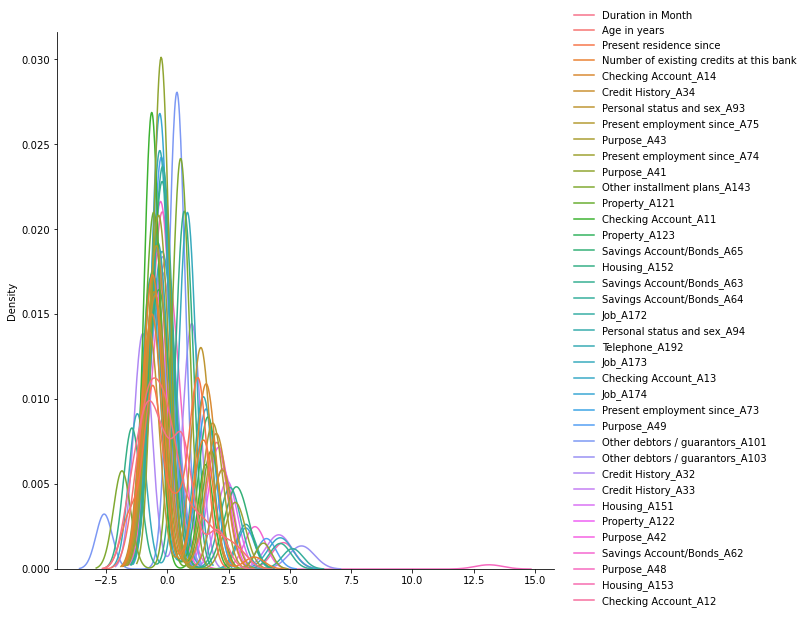

In [102]:
# all features following a normal distribution with mean 0 and standard deviation of 1
sns.displot(test_set_new, kind='kde',aspect=1,height=8)
plt.show()

In [103]:
# replacing standardized features with original features in test_set dataframe
test_set_new.index = test_set.index
test_set_new["Customer Classification"] = test_set["Customer Classification"]
test_set = test_set_new
test_set

,Duration in Month,Age in years,Present residence since,Number of existing credits at this bank,Checking Account_A14,Credit History_A34,Personal status and sex_A93,Present employment since_A75,Purpose_A43,Present employment since_A74,...,Credit History_A32,Credit History_A33,Housing_A151,Property_A122,Purpose_A42,Savings Account/Bonds_A62,Purpose_A48,Housing_A153,Checking Account_A12,Customer Classification
680,-1.529167,2.280590,-0.602890,-0.606275,1.578587,-0.501443,-0.733613,-0.446594,-0.540867,-0.361315,...,0.993095,-0.220059,-0.410720,-0.479702,-0.442869,-0.2801,-0.076205,-0.211263,-0.497834,1
882,1.358811,0.260862,1.251826,1.468960,-0.633478,1.994245,1.363116,2.239171,-0.540867,-0.361315,...,-1.006953,-0.220059,-0.410720,-0.479702,-0.442869,-0.2801,-0.076205,-0.211263,2.008702,1
749,-0.446175,-0.042097,-0.602890,-0.606275,1.578587,-0.501443,1.363116,-0.446594,-0.540867,2.767671,...,0.993095,-0.220059,-0.410720,-0.479702,-0.442869,-0.2801,-0.076205,-0.211263,-0.497834,1
897,-0.807172,0.159876,-0.602890,-0.606275,1.578587,1.994245,-0.733613,-0.446594,-0.540867,2.767671,...,-1.006953,-0.220059,-0.410720,2.084629,2.258006,-0.2801,-0.076205,-0.211263,-0.497834,1
519,-1.529167,0.260862,1.251826,1.468960,1.578587,1.994245,1.363116,2.239171,1.848883,-0.361315,...,-1.006953,-0.220059,-0.410720,-0.479702,-0.442869,-0.2801,-0.076205,4.733435,-0.497834,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,0.636817,-0.849988,1.251826,-0.606275,-0.633478,-0.501443,-0.733613,-0.446594,-0.540867,-0.361315,...,0.993095,-0.220059,-0.410720,-0.479702,-0.442869,-0.2801,-0.076205,-0.211263,2.008702,2
577,0.636817,-0.042097,-0.602890,1.468960,1.578587,1.994245,-0.733613,-0.446594,-0.540867,-0.361315,...,-1.006953,-0.220059,-0.410720,-0.479702,-0.442869,-0.2801,-0.076205,-0.211263,-0.497834,1
335,-1.529167,1.068753,1.251826,-0.606275,-0.633478,1.994245,-0.733613,-0.446594,-0.540867,-0.361315,...,-1.006953,-0.220059,2.434748,-0.479702,2.258006,-0.2801,-0.076205,-0.211263,-0.497834,2
448,-0.807172,2.179604,1.251826,-0.606275,-0.633478,-0.501443,-0.733613,2.239171,-0.540867,-0.361315,...,0.993095,-0.220059,-0.410720,-0.479702,2.258006,-0.2801,-0.076205,-0.211263,-0.497834,1


## ```PCA for test data```

In [104]:
# taking projection of test data on principal component vectors,
# to get same number of features in test data as of train data
test_set_pca = np.dot(test_set.drop(columns="Customer Classification"),k_principal_components.T)
test_set_pca = pd.DataFrame(test_set_pca)
test_set_pca.index = test_set.index
test_set_pca["Customer Classification"] = test_set["Customer Classification"]
test_set_pca

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Customer Classification
680,-0.279680,0.477468,-0.310384,0.831696,-1.217241,-0.168991,-0.198730,-0.846405,-0.821963,-0.535427,...,0.590319,0.634392,0.245134,-1.120343,-0.522741,-1.011473,0.274182,-0.281746,1.404424,1
882,2.720287,0.814739,0.884981,-1.012475,-0.980157,0.251569,0.871303,0.712762,-1.671741,-0.751333,...,-0.013193,-0.885687,-1.253851,-0.323249,1.043907,0.814803,0.952794,0.107764,-0.472197,1
749,1.132041,0.109292,-2.410091,1.885875,0.178867,0.857134,-0.951535,0.927615,1.018430,1.067023,...,-0.697428,0.048363,-0.456822,0.361496,-0.953458,-0.783911,-0.706690,0.555164,1.250661,1
897,1.562782,0.759399,0.613792,-1.021501,-0.435521,2.543616,-2.288014,-0.672939,0.225111,-0.002252,...,-1.954389,-0.709613,1.553914,0.454182,-1.609080,-0.011017,0.951576,-0.145605,-0.608509,1
519,3.769286,-1.007997,-0.567311,-1.490392,-2.711929,-0.165242,1.516631,-0.634957,-2.204732,-0.467826,...,-0.278383,0.415191,0.762744,1.045511,-1.906483,0.917732,0.313350,-0.644199,-1.236311,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,-0.594637,0.108005,-0.675604,0.161814,1.551583,-1.947372,-0.635529,0.664329,-0.023672,0.691831,...,-0.410747,-1.104460,0.859210,-1.412694,-0.044608,0.194859,-2.470074,0.145328,-0.306300,2
577,2.327986,0.754743,-0.354516,1.138939,0.263975,2.278966,0.018913,-0.195127,0.277200,0.823473,...,0.293650,0.502588,0.345306,-1.493705,-0.193930,-0.533143,0.350191,-1.121971,-0.956896,1
335,0.263280,-1.811284,-0.397110,-3.188335,0.489917,-0.229993,-0.221114,-2.121946,2.049121,0.966141,...,0.560158,2.111742,-0.234357,-1.441612,2.335319,0.454468,1.104123,-0.216762,0.774838,2
448,1.705179,-0.694361,-1.470827,-0.107253,-1.380149,-3.607168,0.066513,-1.112290,-0.160786,-1.215446,...,0.929043,1.461152,-3.400889,-3.092648,0.299630,0.964989,1.018435,-0.957420,-0.156196,1


In [105]:
# finally we have test_set in same dimension as our train_set
test_set = test_set_pca
test_set.shape

(145, 31)

# ```Implementing Machine Learning Models```

- Random Forest Classifier
- K Nearest Neighbors
- Perceptron Classifier
- Fishers Linear Discriminant

## ```Classification Report```

- True Positive (TP): Predictions which are predicted by classifier as ```positive``` and are actually ```positive```


- False Positive (FP): Predictions which are predicted by classifier as ```positive``` and are actually ```negative```


- True Negative (TN): Predictions which are predicted by classifier as ```negative``` and are actually ```negative```


- False Negative (FN): Predictions which are predicted by classifier as ```negative``` and are actually ```positive```




- ```Accuracy```

    It describes the number of correct predictions over all predictions.
      
$$
\frac{TP+TN}{TP+FP+TN+FN} = \frac{\text{Number of correct  predictions}}{\text{Number of total predictions}}
$$
    
- ```Precision```

    Precision is a measure of how many of the positive predictions made are correct.
    
$$
\frac{TP}{TP+FP} = \frac{\text{Number of correctly predicted positive instances}}{\text{Number of total positive predictions made}}
$$

- ```Recall```

    Recall is a measure of how many of the positive cases the classifier correctly predicted, over all the positive cases in the data.
    
$$
\frac{TP}{TP+FN} = \frac{\text{Number of correctly predicted positive instances}}{\text{Number of total positive instances in dataset}}
$$

- ```F1 Score```

    F1-Score is a measure combining both precision and recall. It is harmonic mean of both.

$$
\frac{2*{\text{Precision}}*{\text{Recall}}}{\text{Precision}+\text{Recall}}
$$

- ```Support```

    Support may be defined as the number of samples of the true response that lies in each class of target values  
$$
$$
- ```Confusion Matrix```
    
    It is a table with 4 different combinations of predicted and actual values.
    
    
    

                        |                 | Predicted Positive | Predicted Negative  |
                        |-----------------|--------------------|---------------------|
                        | Actual Positive | True Positives     | False Negatives     |
                        | Actual Negative | False Positives    | True Negatives      |

- ```ROC Curve```

    The ROC curve is produced by calculating and plotting the true positive rate against the false positive rate  for a single classifier at a variety of thresholds.
    
    The Area Under the Curve (AUC) is the measure of the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve.The higher the AUC, the better the model’s performance at distinguishing between the positive and negative classes.

$$
    \text{True Positive Rate (TPR) }  =  \frac{TP}{TP+FN}
$$

$$
    \text{False Positive Rate (FPR) }  =  \frac{FP}{FP+TN}
$$

$$
$$

In [106]:
# Machine Learning Algorithms
MLA = {} # dictionary for comparing models
MLA_predictions = {} # dictionary for comparing ROC curve of models

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc

# function to show performance metrics for classification models
def performance_metrics(name,y_test,y_pred):
    # finding accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # calculating classification report
    clf_report = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))
    print("Test Result:\n================================================")        
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")
    
    # roc_auc score
    print("_______________________________________________")
    print("ROC_AUC score is :",roc_auc_score(y_test,y_pred))
    
    # roc curve
    # taking positive class as class of bad customers i.e with label 2
    fpr, tpr, threshold = roc_curve(y_test,y_pred,pos_label=2)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    print()
    
    # confusion matrix
    # 0 -> Negative Class (Good Customers)
    # 1 -> Positive Class (Bad Customers)
    labels = ["True Neg","False Pos","False Neg","True Pos"]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = labels,fmt='',cmap = 'YlGnBu')
    
    MLA[name] = [name,accuracy_score(y_test, y_pred)*100,precision_score(y_test,y_pred),recall_score(y_test,y_pred),roc_auc_score(y_test,y_pred)]
    MLA_predictions[name] = y_pred

## ```Splitting train and test data into x and y components```

In [108]:
x_train = train_set.drop(columns='Customer Classification')
y_train = train_set['Customer Classification']
x_test = test_set.drop(columns='Customer Classification')
y_test = test_set['Customer Classification']

In [109]:
# converting column names in train and test dataset to strings

In [110]:
new_column_names = []
for val in train_set.columns:
    new_column_names.append(str(val))
train_set.columns = new_column_names
test_set.columns = new_column_names

# ```ML Model 1```

# ```Random Forest```

- Random forest is bagging of multiple decision trees. It has lower variance and reduced overfitting as compared to a single decision tree which has higher variance and is prone to overfitting.


- Random forest is more robust to outliers and noise as well.


- Main reason why random forest is so powerful is because of randomness, as each decision tree will be constructed on a bootstrapped subset of our data.


- Firstly, we will select n sample points from our train data with replacement, and then we will select a feature subspace out of all features.


- We will take majority vote from all decision trees for classifying our test data

In [111]:
# creating validation data set, which will be used in pruning of decision tree
train_set_new, val_set = split_train_test(train_set,0.2)

In [112]:
train_set_new.shape

(693, 31)

In [113]:
val_set.shape

(173, 31)

In [114]:
x_train_new = train_set_new.drop(columns='Customer Classification')
y_train_new = train_set_new['Customer Classification']

## ```Helper functions for Decision Tree```

In [115]:
import random
from pprint import pprint

In [116]:
# function to check if y_values are pure i.e all belong to a single class or not
def check_purity(y_values):
    y_values = np.array(y_values)
    unique_classes = np.unique(y_values)
    if(len(unique_classes) == 1):
        return True
    return False

In [117]:
# function to classify data based on majority count in y_values
def classify_data(y_values):
    y_values = np.array(y_values)
    unique_classes, counts_unique_classes = np.unique(y_values, return_counts = True)
    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    return classification

In [118]:
# function to find all possible potential splits for all features
def get_potential_splits(x_train,random_subspace=None):
    # random_subspace is number of features that we will randomly select from all features
    potential_splits = {} # dictionary that will contain splits for each feature
    num_columns = x_train.shape[1]
    
    # for creating a list from 0 to num_columns
    column_indices = list(range(num_columns))
    
    if random_subspace and random_subspace <= len(column_indices):
        column_indices = random.sample(column_indices,random_subspace)
    
    # for each feature we will have multiple splits
    for column_index in column_indices:
        potential_splits[column_index] = []
        values = x_train.iloc[:,column_index]
        unique_values = np.unique(values)
        potential_splits[column_index] = unique_values

    return potential_splits

In [119]:
# split data function
def split_data(train_dataset,split_column,split_value):
    # this will take all values for that particular column
    split_column_values = train_dataset.iloc[:,split_column]
    
    # splitting data into binary split
    left_child_data = train_dataset[split_column_values <= split_value]
    right_child_data = train_dataset[split_column_values > split_value]

    return left_child_data, right_child_data

### ```Entropy```

Entropy is a measurement of uncertainty (sometimes called impurity) has the following formula

$$
H(X) = - \sum_{j} p_{j} log_{2}(p_{j})
$$

\begin{equation}
\text{where} \space {p_{j} \space \text{is the probability of class j}}
\end{equation}

For two class problem, it takes the following form

$$
H(X) = - plog_{2}(p)  -(1-p)log_{2}(1-p)
$$


When we are looking for a value to split our decision tree node, we want to minimize entropy.

In [120]:
# entropy function, to find impurity measure for parent node
def calculate_entropy(train_dataset):
    # to find number of samples belonging to class 1 and class 2
    y_train = np.array(train_dataset.iloc[:,-1])
    _, counts = np.unique(y_train,return_counts=True)
    total_samples = counts.sum()
    
    # this will contain p_j i.e probability of class j, where j=1,2
    probability_of_class = counts / total_samples
    entropy = -sum((probability_of_class * np.log2(probability_of_class)))
    
    return entropy

### ```Overall Entropy```

Overall Entropy for children nodes, can be calculated using the formula

$$
H(children) = \sum_{j}^{2}( \frac{n_{j}}{N} \cdot H_{j})
$$

$$
  \text{where} \space n_{j} \space \text{is number of training samples associated with node j such that}
$$

$$
N = \sum_{j}^{2} n_{j}
$$

$$
  \text{and} \space H_{j} \space\text{is entropy of child node j}
$$

In [121]:
# overall entropy function
def calculate_overall_entropy(left_child_data,right_child_data):
    n1 = len(left_child_data) # number of data points belonging to left child
    n2 = len(right_child_data) # number of data points belonging to right child
    N = n1 + n2 # total number of data points
    overall_entropy = ((n1/N)*calculate_entropy(left_child_data)) + ((n2/N)*calculate_entropy(right_child_data))
    return overall_entropy

### ```Information Gain```

Information gain is a measure which tells how much information we have gained after splitting a node at a particular value.

$$
   \text{Information Gain} = H(Parent) - H(Children)
$$

$$
\text{where} \space H(Parent) \space\text{is entropy of Parent node or entropy before split and} \space H(Children) \space\text{is overall entropy of both left and right child nodes or entropy after split.}
$$

We need to find the split, which results in highest information gain.

In [122]:
# function for finding information gain
def calculate_information_gain(train_dataset,left_child_data,right_child_data):
    return calculate_entropy(train_dataset) - calculate_overall_entropy(left_child_data,right_child_data)

In [123]:
# function for finding best split, by taking highest information gain
def find_best_split(train_dataset):
    information_gain = -1e9
    
    if(len(train_dataset.columns) == 31):
        x_train = train_dataset.drop(columns="Customer Classification")
    else:
        x_train = train_dataset
        
    # find all possible splits
    potential_splits = get_potential_splits(x_train)

    # iterating over all splits to find best split, which gives minimum overall entropy
    for column_index in potential_splits:
        for value in potential_splits[column_index]:

            # this will give data points for left and right child
            left_child_data, right_child_data = split_data(x_train,column_index,value)
            information_gain_current = calculate_information_gain(train_dataset,left_child_data,right_child_data)

            if information_gain_current > information_gain:
                information_gain = information_gain_current
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

# ```Decision Tree Algorithm```

- We will represent our decision tree in form of a dictionary {}, where {key:[yes,no]} represents a node, in which key will be a question and yes corresponds to left child node and no corresponds to right child node

- Also yes and no can contain dictionaries, which will represent the left and right subtrees

### ```Pre Pruning of Decision Tree```

Pre pruning is nothing but stopping the growth of decision tree on an early stage before it perfectly fits the entire training data. For that we can limit the growth of trees by setting constrains. We can limit parameters like max_depth, min_samples etc.

In [124]:
def decision_tree_algorithm(train_dataset,counter=0,min_samples=2,max_depth=5,random_subspace=None):
    
    # converting train_dataset to numpy 2d array
    if counter == 0:
        global column_headers
        column_headers = train_dataset.columns
        # first call of this function, so convert train_dataset to numpy 2d array
        data = train_dataset.values
    else:
        data = train_dataset
    
    x_train = train_dataset.drop(columns="Customer Classification")
    y_train = train_dataset.iloc[:,-1]
    
    # base case, if node is pure, or contains less than min_samples or depth of tree has reached max_depth so stop
    if (check_purity(y_train)) or (len(train_dataset) < min_samples) or (counter == max_depth):
        classification = classify_data(y_train)
        return classification
    
    else:
        # recursive part of decision tree algorithm
        counter += 1 # increment the depth of decision tree

        # helper functions
        potential_splits = get_potential_splits(x_train,random_subspace)
        split_column, split_value = find_best_split(x_train)
        left_child_data, right_child_data = split_data(train_dataset,split_column,split_value)
        
        if len(left_child_data) == 0 or len(right_child_data) == 0:
            classification = classify_data(y_train)
            return classification
        
        # instantiate sub tree
        feature_name = column_headers[split_column]
        question = "{} <= {}".format(feature_name,split_value)
        sub_tree = {question : []}
        
        # find answers
        yes_answer = decision_tree_algorithm(left_child_data,counter,min_samples,max_depth,random_subspace)
        no_answer = decision_tree_algorithm(right_child_data,counter,min_samples,max_depth,random_subspace)
        
        # if both answers are same then, assign sub_tree as yes_answer instead of left and right child
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)

        return sub_tree

In [125]:
tree = decision_tree_algorithm(train_set_new,counter=0,min_samples=2,max_depth=10)
tree

{'0 <= -0.44525615492467496': [{'0 <= -1.4625045474926888': [{'11 <= 0.11030208029608386': [{'0 <= -1.8742067901469943': [{'0 <= -2.074078702907744': [{'0 <= -2.554752767119954': [{'0 <= -2.715548586953616': [{'0 <= -2.93403167897067': [1,
                {'0 <= -2.8113194387266267': [1, 2]}]},
              {'0 <= -2.6614380921171223': [1, 2]}]},
            {'1 <= 0.8274488570863294': [{'0 <= -2.204612347071965': [{'0 <= -2.319486504350986': [2,
                  1]},
                2]},
              {'0 <= -2.174750648365433': [{'0 <= -2.4960927380240685': [1,
                  {'0 <= -2.4069077431246377': [2, 1]}]},
                2]}]}]},
          {'0 <= -1.9628534211079505': [{'0 <= -2.0259938784421996': [{'0 <= -2.0473816950715085': [{'0 <= -2.063169829398294': [1,
                  2]},
                2]},
              {'0 <= -1.9870590635637702': [2,
                {'0 <= -1.9717585684111794': [2, 1]}]}]},
            {'0 <= -1.914519932694284': [{'0 <= -1.9479175327320

In [126]:
# classify example
def classify_example(example,tree):
    question = list(tree.keys())[0]
    feature_name, comparision_operator, value = question.split()
    
    # ask a question
    if example[int(feature_name)] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]
        
    # base case, answer is a leaf node
    if not isinstance(answer,dict):
        return answer
    else:
        # recursive part
        residual_tree = answer
        return classify_example(example,residual_tree)

In [127]:
def make_predictions(x_test,tree):
    # find predicted values for each test data point
    predicted_output = []
    for ind in range(len(x_test)):
        predicted_output.append(classify_example(x_test.iloc[ind],tree))
    
    return predicted_output

In [128]:
def calculate_accuracy(y_predicted,y_test):
    # finding accuracy
    correct_predictions = 0
    for ind in range(len(y_test)):
        if y_test.iloc[ind] == y_predicted[ind]:
            correct_predictions += 1
    
    accuracy = correct_predictions / len(y_test)
    return accuracy

In [129]:
y_predicted = make_predictions(x_test,tree)
calculate_accuracy(y_predicted,y_test)*100

57.931034482758626

## ```Post Pruning in Decision Tree```

- This is done after construction of decision tree, pruning is done in a bottom-up fashion.

- It is done by replacing a subtree with a new leaf node with a class label which is majority class of records.

- We are using validation dataset for post pruning of decision tree

In [130]:
# pass validation data set instead of test data set

In [131]:
def filter_df(df,question):
    feature, _ , value = question.split()
    df_yes =  df[df[feature] <= float(value)]
    df_no =  df[df[feature] > float(value)]
    
    return df_yes, df_no

In [132]:
def pruning_result(tree,x_train,y_train,x_val,y_val):
    
    # setting leaf with value as majority label in train set
    leaf = y_train.value_counts().index[0]
    errors_leaf = sum(y_val != leaf)
    errors_decision_node = sum(y_val != make_predictions(x_val,tree))

    # returning leaf node or subtree whichever has less error
    if errors_leaf <= errors_decision_node:
        return leaf
    else:
        return tree

In [133]:
def post_pruning(tree,train_set,val_set):
    
    # find question for root node of tree
    question = list(tree.keys())[0]
    
    # this will give left and right subtrees
    yes_answer, no_answer = tree[question]
    
    x_train = train_set.drop(columns='Customer Classification')
    y_train = train_set['Customer Classification']
    x_val = val_set.drop(columns='Customer Classification')
    y_val = val_set['Customer Classification']

    # base case
    # both left and right subtrees are leaf nodes, so either it will return the same tree, or replace this tree with a leaf node
    if not isinstance(yes_answer,dict) and not isinstance(no_answer,dict):
        return pruning_result(tree,x_train,y_train,x_val,y_val)
        
    # recursive part
    else:
        df_train_yes, df_train_no = filter_df(train_set,question)
        df_val_yes, df_val_no = filter_df(val_set,question)
        
        # left subtree, this will do post pruning on left subtree recursively
        if isinstance(yes_answer,dict):
            yes_answer =  post_pruning(yes_answer,df_train_yes,df_val_yes)
            
        # right subtree, this will do post pruning on right subtree recursively
        if isinstance(no_answer,dict):
            no_answer = post_pruning(no_answer,df_train_no,df_val_no)
        
        # new tree, so that it doesn't replace the existing tree
        tree = {question:[yes_answer,no_answer]}
        
    # we are calling pruning_result here, because the tree after post_pruning can be replaced by a single leaf node
    return pruning_result(tree,x_train,y_train,x_val,y_val)

In [134]:
pruned_tree = post_pruning(tree,train_set_new,val_set)
pruned_tree

{'0 <= -0.44525615492467496': [{'0 <= -1.4625045474926888': [{'11 <= 0.11030208029608386': [{'0 <= -1.8742067901469943': [{'0 <= -2.074078702907744': [{'0 <= -2.554752767119954': [{'0 <= -2.715548586953616': [1,
              2]},
            2]},
          {'0 <= -1.9628534211079505': [{'0 <= -2.0259938784421996': [{'0 <= -2.0473816950715085': [1,
                2]},
              2]},
            {'0 <= -1.914519932694284': [{'0 <= -1.9479175327320448': [2, 1]},
              2]}]}]},
        {'0 <= -1.7427492674378389': [{'0 <= -1.8038929081773967': [{'0 <= -1.8479455251407837': [1,
              2]},
            {'0 <= -1.7637572375469837': [2, 1]}]},
          2]}]},
      2]},
    {'0 <= -1.0138720638219028': [{'0 <= -1.2419729054182573': [2,
        {'0 <= -1.131515201967357': [{'0 <= -1.1695416445848401': [{'0 <= -1.2187163898697735': [1,
              {'0 <= -1.209312200287913': [1,
                {'0 <= -1.2074115322546484': [2,
                  {'0 <= -1.174278494030732':

## ```Visualizing Decision Boundaries after Post Pruning```

- We can see that unpruned tree has overfitting, it overfits the train dataset, but pruned tree prevents overfitting

In [135]:
def plot_decision_boundaries(tree, x_min, x_max, y_min, y_max):
    color_keys = {1: "orange", 2: "blue"}
    
    # recursive part
    if isinstance(tree, dict):
        question = list(tree.keys())[0]
        yes_answer, no_answer = tree[question]
        feature, _, value = question.split()
    
        if feature == "0":
            plot_decision_boundaries(yes_answer, x_min, float(value), y_min, y_max)
            plot_decision_boundaries(no_answer, float(value), x_max, y_min, y_max)
        else:
            plot_decision_boundaries(yes_answer, x_min, x_max, y_min, float(value))
            plot_decision_boundaries(no_answer, x_min, x_max, float(value), y_max)
        
    # "tree" is a leaf
    else:
        plt.fill_between(x=[x_min, x_max], y1=y_min, y2=y_max, alpha=0.2, color=color_keys[tree])
        
    return

In [136]:
def create_plot(df,tree=None,title=None):
    sns.lmplot(data=df,x=df.columns[0], y=df.columns[1], hue="Customer Classification", fit_reg=False, height=4, aspect=1.5, legend=False)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(["Bad Customer","Good Customer"])
    plt.title(title)
    
    if tree or tree == False: # root of the tree might just be a leave with "False"
        x_min, x_max = round(df["0"].min()), round(df["0"].max())
        y_min, y_max = round(df["1"].min()), round(df["1"].max())

        plot_decision_boundaries(tree, x_min, x_max, y_min, y_max)
    
    return

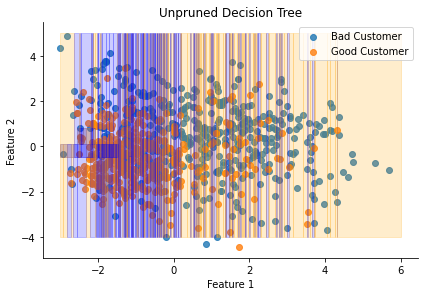

In [137]:
# plotting decision boundaries for train_set using unpruned tree
create_plot(train_set,tree,"Unpruned Decision Tree")

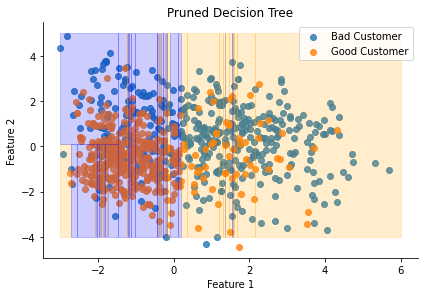

In [138]:
# plotting decision boundaries for train_set using pruned decision tree
create_plot(train_set,pruned_tree,"Pruned Decision Tree")

## ```Accuracy difference before and after pruning decision tree```

In [139]:
# before pruning decision tree
y_predicted = make_predictions(x_test,tree)
calculate_accuracy(y_predicted,y_test)*100

57.931034482758626

In [140]:
# after pruning decision tree
y_predicted = make_predictions(x_test,pruned_tree)
calculate_accuracy(y_predicted,y_test)*100

66.20689655172414

# ```Random Forest Algorithm```

In [141]:
# function to create bootstrap samples
def bootstrapping(df,n_bootstrap):
    # will randomly select indices between 0 and len(train_df)
    bootstrap_indices = np.random.randint(low=0,high=len(df),size=n_bootstrap)
    bootstrapped_df = df.iloc[bootstrap_indices] # bootstrapped dataframe
    
    return bootstrapped_df

In [142]:
# function for finding forest
def random_forest_algorithm(train_df, val_df, n_trees, n_bootstrap, n_features, min_samples_split, decision_tree_max_depth):
    forest = [] # this will contain all the trees
    
    # creating n_trees and adding to random forest
    for i in range(n_trees):
        df_train_bootstrapped = bootstrapping(train_df,n_bootstrap)
        
        # creating unpruned decision tree
        tree = decision_tree_algorithm(df_train_bootstrapped,counter=0,min_samples=min_samples_split,max_depth=decision_tree_max_depth,random_subspace=n_features)
        
        # post pruning decision tree, with validation dataframe
        pruned_tree = post_pruning(tree,df_train_bootstrapped,val_df)
        
        # adding pruned decision tree to forest
        forest.append(pruned_tree)
        
    return forest

In [143]:
def random_forest_predictions(test_set,forest):
    # dataframe to store columns as predictions made by tree 1,2,3...
    df_predictions = {}
    
    # finding prediction of each decision tree
    for i in range(len(forest)):
        column_name = "Tree_{}".format(i)
        predictions = make_predictions(test_set,forest[i])
        df_predictions[column_name] = predictions

    df_predictions = pd.DataFrame(df_predictions)
    
    # taking mode of all decision trees
    random_forest_predictions = df_predictions.mode(axis=1)[0]
    
    return random_forest_predictions

## ```Training Random Forest Model```

In [144]:
def random_forest_result(n_trees_array,n_bootstrap_array,n_features_val,min_samples_split_val,decision_tree_max_depth_val):
    accuracy_array = []
    predictions_array = []
    
    for i in range(len(n_trees_array)):
        # training a random forest for these hyperparameters
        forest = random_forest_algorithm(train_set_new,val_set,n_trees=n_trees_array[i],n_bootstrap=n_bootstrap_array[i],n_features=n_features_val,min_samples_split = min_samples_split_val, decision_tree_max_depth=decision_tree_max_depth_val)
        
        # predictions for this random forest
        predictions = random_forest_predictions(test_set,forest)
        predictions_array.append(predictions)
        
        accuracy_array.append(calculate_accuracy(predictions,y_test))
        print(f"Accuracy for Random Forest with number of trees as {n_trees_array[i]} and number of samples as {n_bootstrap_array[i]} is {calculate_accuracy(predictions,y_test)}")
    
    return accuracy_array, predictions_array

In [145]:
import math
n_trees_array = [5,10,25,50,100]
n_bootstrap_array = [int(len(train_set_new)/3) for i in range(len(n_trees_array))]
n_features_val = int(math.log2(train_set_new.shape[1]-1)+1)
min_samples_split_val = 2
decision_tree_max_depth_val = 10

accuracy_array,predictions_array  = random_forest_result(n_trees_array,n_bootstrap_array,n_features_val,min_samples_split_val,decision_tree_max_depth_val)

Accuracy for Random Forest with number of trees as 5 and number of samples as 231 is 0.7448275862068966
Accuracy for Random Forest with number of trees as 10 and number of samples as 231 is 0.7448275862068966
Accuracy for Random Forest with number of trees as 25 and number of samples as 231 is 0.7241379310344828
Accuracy for Random Forest with number of trees as 50 and number of samples as 231 is 0.7103448275862069
Accuracy for Random Forest with number of trees as 100 and number of samples as 231 is 0.7241379310344828


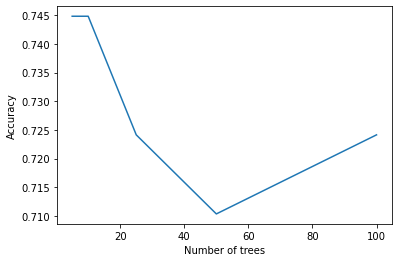

In [146]:
plt.plot(n_trees_array,accuracy_array)
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.show()

In [147]:
# finding highest accuracy random forest model
max_index = 0
highest_accuracy = accuracy_array[0]

for i in range(len(accuracy_array)):
    if accuracy_array[i] > highest_accuracy:
        highest_accuracy = accuracy_array[i]
        max_index = i

best_predictions = predictions_array[max_index]

# ```Visualizing results predicted by Random Forest with actual values```

In [148]:
def plot_scatter_plot(values,title):
    for ind in range(len(best_predictions)):
        if(np.array(values)[ind] == 1):
            plt.scatter(x_test.iloc[ind][0],x_test.iloc[ind][1],color='blue')
        else:
            plt.scatter(x_test.iloc[ind][0],x_test.iloc[ind][1],color='orange')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

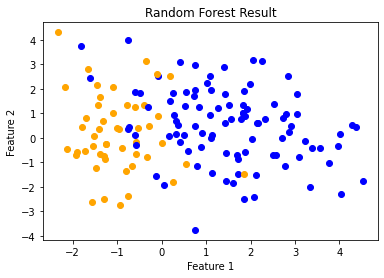

In [149]:
# plotting scatter plot for prediction made by Random Forest using first 2 features of test data set
plot_scatter_plot(best_predictions,"Random Forest Result")

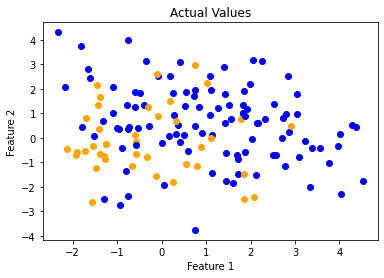

In [150]:
# plotting scatter plot for actual values of data points using first 2 features of test data set
plot_scatter_plot(y_test,"Actual Values")

# ```Classification Report for Random Forest Model``` 

Test Result:
Accuracy Score: 74.48%
_______________________________________________
CLASSIFICATION REPORT:
                    1          2  accuracy   macro avg  weighted avg
precision    0.854167   0.530612  0.744828    0.692389      0.764910
recall       0.780952   0.650000  0.744828    0.715476      0.744828
f1-score     0.815920   0.584270  0.744828    0.700095      0.752017
support    105.000000  40.000000  0.744828  145.000000    145.000000
_______________________________________________
Confusion Matrix: 
 [[82 23]
 [14 26]]

_______________________________________________
ROC_AUC score is : 0.7154761904761904


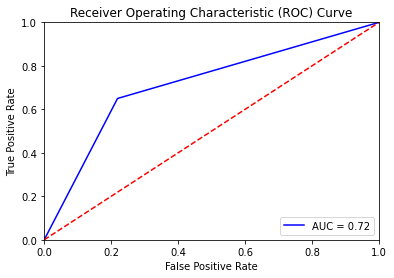

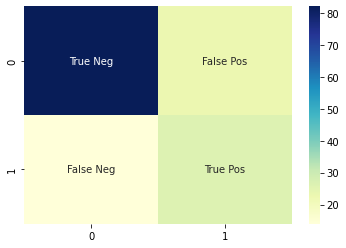

In [151]:
performance_metrics("Random Forest",y_test,best_predictions)

# ```ML Model 2```

# ```Fishers Linear Discriminant```

# Fishers Linear Discriminant

- Fisher's Linear Discriminant is a supervised learning classifier used to find a set of weights that can help us draw a decision boundary and classify the given labelled data.


- Main aim is to find a boundary vector that maximizes the separation between two classes of the given projected data.


- The following formulae are used:

- Covariance matrix is given by ($\tilde{X}$
 is the demeaned data matrix, $S$ is the Covariance matrix)
 
$$
S= \frac{1}{n} \tilde{X}^T \tilde{X}
$$

- Demeaned data matrix is the matrix whose each element is of the form $X_i$ = $(x_i - \mu)$



- We then compute the within-class covariance $S_w$ as follows 

$$
S_w = S_{class1} + S_{class2}
$$

- $S_w^{-1}$ is the inverse of the combined covariances of the two classes



- Consider $m_1$ and $m_2$ to be the means of classes 1 and 2 respectively. We then calculate the difference of means $m_{difference}$ and the sum of means $m_{sum}$ to compute the projection vector and threshold value

$$
m_{difference} = m_1 - m_2
$$

$$
m_{sum} = m_1 + m_2
$$

- We then compute the $projection$ $vector$ which is proportional to the dot product of the transpose of the mean difference and the inverse of within class covariance

$$
\text{Projection vector } \alpha\  (m_{difference})^T \cdot (S_W^{-1})
$$

- We compute the $Threshold$ value as follows
$$
Threshold = 0.5*(projection\ vector)\cdot(m_{sum})
$$



- We compute the mean $m$ of the means of the two classes
$$
m = (m_1 + m_2)/2
$$

- Consider $l^{T}$ to be 
$$
l^{T} = (m_{difference})^T\cdot S^{-1}
$$

- Consider $y_0$ to be 
$$
y_0 = l^Tx_0
$$


- If $E[y_0]$ is near to $m_1$, then it will belong to $Class\ 1$, else it will belong to $Class\ 2$


- Assign a datapoint $x_0$ to $Class\ 1$ if $y_0 > m$, else assign the datapoint to $Class\ 2$


- Here $m$ is given by 
$$
m = 0.5*(m_1 - m_2)^TS^{-1}(m_1+m_2)
$$

In [152]:
class_1_data = train_set[train_set['Customer Classification'] == 1]
class_2_data = train_set[train_set['Customer Classification'] == 2]
class_1_data = class_1_data.drop(columns='Customer Classification')
class_2_data = class_2_data.drop(columns='Customer Classification')

class1 = np.array(class_1_data)
class2 = np.array(class_2_data)

# finding means of both classes
mean_class1 = np.mean(class1, axis=0)
mean_class2 = np.mean(class2, axis=0)

In [153]:
def custom_covariance_matrix(data):
    # Calculate the mean of each variable
    means = np.mean(data, axis=0)
    # Demean the data
    demeaned_data = data - means
    
    # Calculate the covariance matrix
    cov_matrix = np.dot(demeaned_data.T, demeaned_data)
    cov_matrix = np.matrix(cov_matrix)
    
    return cov_matrix

In [154]:
# finding Sw matrix
Sw = custom_covariance_matrix(class1) + custom_covariance_matrix(class2)
Sw_inverse = np.linalg.inv(Sw)

mean_difference = mean_class1 - mean_class2
mean_sum = mean_class1 + mean_class2

# finding projection vector
projection_vector = np.dot(mean_difference.T,Sw_inverse)

# finding threshold
threshold = 0.5*(np.dot(projection_vector,mean_sum))

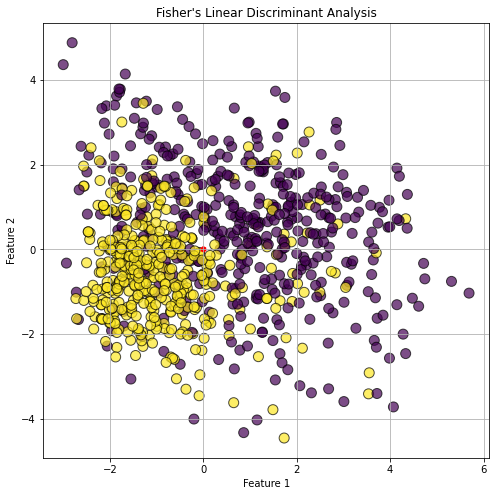

In [155]:
plt.figure(figsize=(8, 8))
# taking 2 features to plot it in the 2d plane
plt.scatter(x_train.iloc[:,0], x_train.iloc[:,1], c=y_train, cmap='viridis', edgecolors='k', marker='o', s=100, alpha=0.7)
# The point marked red is the point through which the projection vector passes in a 30 dimensional plane
plt.quiver(0, 0, projection_vector.T[0], projection_vector.T[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.015)
plt.title("Fisher's Linear Discriminant Analysis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [156]:
predictions = []
projected_test = []
for ind in range(len(x_test)):
    projected_test_data = np.dot(projection_vector,x_test.iloc[ind])
    projected_test.append(projected_test_data)
    if projected_test_data > threshold:
        projected_test_data = 1
    else:
        projected_test_data = 2
    predictions.append(projected_test_data)

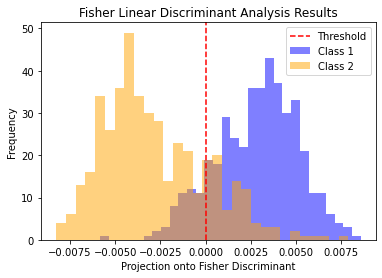

In [157]:
# Ensure class1 and class2 are standard NumPy arrays
class1 = class1.data if hasattr(class1, 'data') else class1
class2 = class2.data if hasattr(class2, 'data') else class2

# Project the training data onto the Fisher discriminant
projected_class1 = np.dot(class1, projection_vector.T)
projected_class2 = np.dot(class2, projection_vector.T)

# Convert masked arrays to regular arrays (if applicable)
projected_class1 = projected_class1.data if hasattr(projected_class1, 'data') else projected_class1
projected_class2 = projected_class2.data if hasattr(projected_class2, 'data') else projected_class2

# Convert to NumPy arrays
projected_class1 = np.asarray(projected_class1)
projected_class2 = np.asarray(projected_class2)

# Flatten arrays to 1D if they are still 2D
projected_class1 = projected_class1.ravel() if len(projected_class1.shape) > 1 else projected_class1
projected_class2 = projected_class2.ravel() if len(projected_class2.shape) > 1 else projected_class2

# Plot histograms
plt.hist(projected_class1, bins=30, alpha=0.5, label='Class 1', color='blue')
plt.hist(projected_class2, bins=30, alpha=0.5, label='Class 2', color='orange')

plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.title('Fisher Linear Discriminant Analysis Results')
plt.xlabel('Projection onto Fisher Discriminant')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# ```Classification Report for Fishers Linear Discriminant Model```

Test Result:
Accuracy Score: 80.00%
_______________________________________________
CLASSIFICATION REPORT:
                    1          2  accuracy   macro avg  weighted avg
precision    0.827586   0.689655       0.8    0.758621      0.789536
recall       0.914286   0.500000       0.8    0.707143      0.800000
f1-score     0.868778   0.579710       0.8    0.724244      0.789035
support    105.000000  40.000000       0.8  145.000000    145.000000
_______________________________________________
Confusion Matrix: 
 [[96  9]
 [20 20]]

_______________________________________________
ROC_AUC score is : 0.7071428571428572


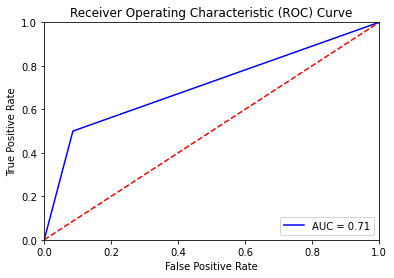

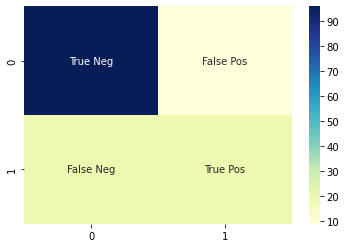

In [158]:
performance_metrics("Fishers Linear Discriminant",y_test,predictions)

# ```ML Model 3```

# Multilayer Perceptron

- Multilayer Perceptron is a type of Artificial Neural Networks (ANN), which is listed under supervised learning algorithms.


- It is basically a feed-forward neural network algorithm.


- It is called Multilayer Perceptron as there are multiple hidden layers between the input and the output values, which helps the model understand the complex mappings between the inputs and outputs.


- The overall structure of the Multilayer Perceptron is as follows:
    1. Input Layer: The input layer contains nodes(neurons), each of which corresponds to each feature of the input data. The number of nodes(neurons) in the input layer denotes the dimensionality of the input data.
    2. Hidden Layer(s): Data from input layer is passed through the hidden layers, which makes the neural network to understand the complex inferences from the given input dataset.
    3. Output Layer: The output layer helps produce the the network's predictions.
    4. Loss Function: The difference between the observed values and the expected values is called the loss, which is computed by the loss function. The main aim of during training is to minimize the loss as much as possible.
    
    
    
- The Multilayer Perceptron works as follows:
    1. Initialize weights and biases: Initializing weights and biases with random values
    2. Forward Propagation: In this step, data moves sequentially from the input layer, through the hidden layers, and reaches the output layer, with the weights that are assigned to each link (connecting nodes) are adjusted while training.
    3. Backward Propagation: During the feed-forward process, the errors are computed by calculating the differences between the expected and the observed values. The backpropagation process starts by propagating the error backward through the network. Main aim of this step is to observe the contribution of each weight to overall error.
    4. Continue doing until the end of epochs is reached.
    
Hidden layer(s): 
For each layer, the activations and outputs are calculated as: 
$$
L_{j}^{l} = \sum_{i} w_{j,i}^{l} x_{i}^{l} = w_{j,0}^{l} x_{0}^{l} + w_{j,1}^{l} x_{1}^{l} + w_{j,2}^{l} x_{2}^{l} + \ldots + w_{j,n}^{l} x_{n}^{l}
$$

$$
Y_{j}^{l} = g^{l}(L_{j}^{l})\\
\{ y_i, x_{i1}, \ldots, x_{ip} \}_{i=1}^{n}
$$

- $x_{i}^{l}$ denotes the $i^{th}$ input to layer $l$ coming from the $l^{th}$ layer,
- $y_{j}^{l}$ represents the output of the $j^{th}$ neuron in layer $l$,
- $w_{j,i}^{l}$ signifies the weight of the connection between the $i^{th}$ neuron in layer $l$ and the $j^{th}$ neuron in the same layer $l$,
- $L_{j}^{l}$ represents the net activation of the $j^{th}$ neuron in layer $l$,
- $g^{l}(\cdot)$ stands for the activation function of layer $l$.

Error calculation in backward propagation:

- Output layer error $\delta_{output}$:

  The error for the output layer $\delta_{output}$ can be computed using the following formula:
  $$\delta_{\text{output}} = (y_{\text{expected}} - y_{\text{predicted}}) \times \text{sigmoid_derivative}(y_{\text{predicted}})$$
    - $y_{expected}$ represents the expected output,
    - $y_{predicted}$ represents the output obtained from the forward propagation phase,
    - The sigmoid derivative function $\text{sigmoid_derivative}$ calculates the derivative of the sigmoid activation function used in the output layer.



- Hidden layer error $\delta_{hidden}$:

  For hidden layers, the error $\delta_{hidden}$ can be calculated based on the error of the next layer and the weights connecting the current layer to the next layer:
  $$\delta_{\text{hidden}} = \delta_{\text{next}} \times \text{weights}_{\text{current}}^T \times \text{sigmoid_derivative}(\text{layer_output})$$
    - $delta_{next}$ represents the error from the next layer,
    - $weights_{current}^T$ denotes the transpose of the weights connecting the current layer to the next layer,
    - $\text{layer_output}$ represents the output of the current layer during forward propagation.


Weight Updation:

- Update Weights weights[i]:
$$\text{weights}[i] \space += \text{layer_outputs}[i].\text{T} \cdot \text{deltas}[i] \times \text{learning_rate}$$
  
  
  - $\text{weights[i]}$ represents the weights of the $i^{th}$ layer,
  - $\text{layer_outputs[i]}.\text{T}$ denotes the transpose of the output of the $i^{th}$ layer during forward propagation.
  - $\text{deltas[i]}$ represents the calculated error(delta) for the $i^{ith}$ layer during backward propagation.
  - $\text{learning_rate}$ is the learning rate, controlling the step size during weight updates.

In [159]:
# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# softmax function for finding probabilities of each class
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [160]:
# function for initializing weight vectors
def initialize_weights(input_size, hidden_size, output_size):
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    weights_hidden_output = np.random.rand(hidden_size, output_size)
    
    return weights_input_hidden, weights_hidden_output

In [161]:
# function for forward propagation
def forward_propagation_function(X, weights_input_hidden, weights_hidden_output):
    hidden_layer_input = np.dot(X, weights_input_hidden)
    
    # applying sigmoid function on hidden layer input to get the hidden layer output
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    
    # finding output by using softmax on output_layer_output
    output = softmax(output_layer_input)

    return hidden_layer_output, output


# function for backward propagation
def backward_propagation_function(X, y, hidden_layer_output, output, weights_hidden_output):
    output_error = output - y # error in output
    output_delta = output_error

    hidden_layer_error = output_delta.dot(weights_hidden_output.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_output * (1 - hidden_layer_output)

    return output_delta, hidden_layer_delta

In [162]:
# function for updating weights
def update_weights(X, hidden_layer_output, output_delta, hidden_layer_delta, weights_input_hidden, weights_hidden_output, learning_rate):
    
    weights_hidden_output -= hidden_layer_output.T.dot(output_delta) * learning_rate
    weights_input_hidden -= X.T.dot(hidden_layer_delta) * learning_rate

# The categorical_cross_entropy function calculates the categorical cross-entropy loss between the true class labels and the predicted probabilities.
def categorical_cross_entropy(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred)) / len(y_true)

# one_hot_encode function is used to convert categorical labels into one-hot encoded vectors.
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]

In [163]:
# calculating accuracy 
def calculate_accuracy(y_true, y_pred):
    predictions = np.argmax(y_pred, axis=1)
    accuracy = np.mean(predictions == y_true)
    return accuracy

In [164]:
def train(X, y, input_size, hidden_size, output_size, epochs, learning_rate,print_value=True):
    weights_input_hidden, weights_hidden_output = initialize_weights(input_size, hidden_size, output_size)

    y_one_hot = one_hot_encode(y, output_size)
    
    # for each epoch
    for epoch in range(epochs):
        # Forward propagation
        hidden_layer_output, output = forward_propagation_function(X, weights_input_hidden, weights_hidden_output)

        # Backward propagation
        output_delta, hidden_layer_delta = backward_propagation_function(X, y_one_hot, hidden_layer_output, output, weights_hidden_output)

        # Update weights
        update_weights(X, hidden_layer_output, output_delta, hidden_layer_delta, weights_input_hidden, weights_hidden_output, learning_rate)

        # Print the categorical cross-entropy loss and accuracy every 100 epochs
        if epoch % 100 == 0:
            loss = categorical_cross_entropy(y_one_hot, output)
            accuracy = calculate_accuracy(y, output)
            if print_value:
                print(f"Epoch number {epoch}, Categorical Cross-Entropy Loss is: {loss}, Accuracy is: {accuracy}")

    return weights_input_hidden, weights_hidden_output

## ```Training Multilayer Perceptron Model```

In [165]:
# hyperparameter tuning
input_size = train_set.shape[1]-1 # as one atrribute is label
hidden_size = 10 # number of neurons in hidden layer
output_size = 2  # Adjust the number of classes as needed
epochs = 1000
learning_rate = 0.001

# as our y_train contains values 1 and 2, but our output will classify as 0 and 1, so we are passing y_train as y_train-1
# i.e class1 will have label 0 and class2 will have label 1
trained_weights_input_hidden, trained_weights_hidden_output = train(x_train, y_train-1, input_size, hidden_size, output_size, epochs, learning_rate)

hidden_layer_output, predictions = forward_propagation_function(x_test, trained_weights_input_hidden, trained_weights_hidden_output)

Epoch number 0, Categorical Cross-Entropy Loss is: 0.7374411352455013, Accuracy is: 0.46882217090069284
Epoch number 100, Categorical Cross-Entropy Loss is: 0.3257819108079847, Accuracy is: 0.851039260969977
Epoch number 200, Categorical Cross-Entropy Loss is: 0.27987483816859315, Accuracy is: 0.8660508083140878
Epoch number 300, Categorical Cross-Entropy Loss is: 0.24841866591072131, Accuracy is: 0.8822170900692841
Epoch number 400, Categorical Cross-Entropy Loss is: 0.22102430286824276, Accuracy is: 0.8983833718244804
Epoch number 500, Categorical Cross-Entropy Loss is: 0.19506077420082518, Accuracy is: 0.9110854503464203
Epoch number 600, Categorical Cross-Entropy Loss is: 0.17228067928247248, Accuracy is: 0.930715935334873
Epoch number 700, Categorical Cross-Entropy Loss is: 0.1531183172572197, Accuracy is: 0.9399538106235565
Epoch number 800, Categorical Cross-Entropy Loss is: 0.13759019426401758, Accuracy is: 0.9491916859122402
Epoch number 900, Categorical Cross-Entropy Loss is:

In [166]:
# priniting the predictions of multilayer perceptron on test_data
print(predictions[:10]) # for top 10 data points

[[5.30843478e-02 9.46915652e-01]
 [8.85706761e-01 1.14293239e-01]
 [9.99985323e-01 1.46768189e-05]
 [9.99997228e-01 2.77167264e-06]
 [9.99739265e-01 2.60735145e-04]
 [9.99864724e-01 1.35275975e-04]
 [7.18218278e-01 2.81781722e-01]
 [9.99021077e-01 9.78922515e-04]
 [1.76570598e-01 8.23429402e-01]
 [9.88810816e-01 1.11891845e-02]]


## ```Accuracy for different number of neurons in hidden layer```

In [167]:
hidden_size_array = [5,10,15,20,25,30,35,40,50,100]
accuracy_array = []
predictions_array = []

for i in range(len(hidden_size_array)):
    # training multilayer perceptron
    trained_weights_input_hidden, trained_weights_hidden_output = train(x_train, y_train-1, input_size, hidden_size_array[i], output_size, epochs, learning_rate,False)
    # finding predictions
    hidden_layer_output, predictions = forward_propagation_function(x_test, trained_weights_input_hidden, trained_weights_hidden_output)
    predictions_new = np.argmax(predictions, axis=1)
    predictions_array.append(predictions_new)
    accuracy_array.append(calculate_accuracy(y_test-1,predictions))

## ```Visualizing Accuracy Values for different number of neurons```

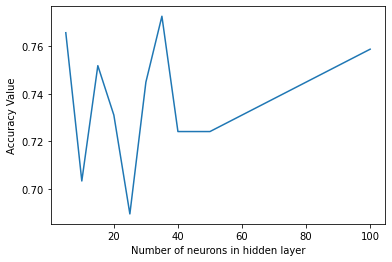

In [168]:
plt.plot(hidden_size_array,accuracy_array)
plt.xlabel("Number of neurons in hidden layer")
plt.ylabel("Accuracy Value")
plt.show()

In [169]:
# max accuracy value
accuracy_val = accuracy_array[0]
max_index = 0
for ind in range(len(accuracy_array)):
    if accuracy_array[ind] > accuracy_val:
        accuracy_val = accuracy_array[ind]
        max_index = i

In [170]:
predictions = predictions_array[max_index]
predictions = predictions + 1

# ```Classification Report for Multilayer Perceptron Model```

Test Result:
Accuracy Score: 75.86%
_______________________________________________
CLASSIFICATION REPORT:
                    1          2  accuracy   macro avg  weighted avg
precision    0.836538   0.560976  0.758621    0.698757      0.760521
recall       0.828571   0.575000  0.758621    0.701786      0.758621
f1-score     0.832536   0.567901  0.758621    0.700219      0.759533
support    105.000000  40.000000  0.758621  145.000000    145.000000
_______________________________________________
Confusion Matrix: 
 [[87 18]
 [17 23]]

_______________________________________________
ROC_AUC score is : 0.7017857142857142


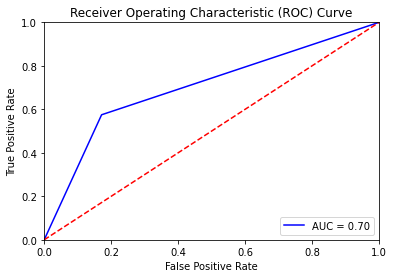

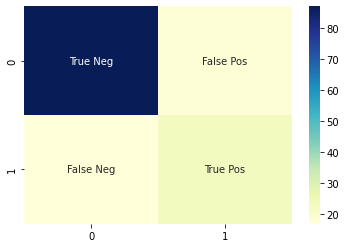

In [171]:
performance_metrics("Multilayer Perceptron",y_test,predictions)

# ```ML Model 4 (Based on research literature)```

# ```K Nearest Neighbors```

- KNN Algorithm compares a point in test dataset with the values in the given training dataset and based on its closeness or similarities in given range of K neighbors it assigns the point to the majority class.

- It is called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

- We have different metrics that can be used to calculate distance



    - Minkowski Distance
    
    The Minkowski distance is a generalization of several distance metrics, including the Euclidean distance and the Manhattan distance. It is a way to measure the distance between two points in a multi-dimensional space.
    
$$
d(p,q) = ({\sum_{i=1}^n{|q_i - p_i|^p}})^{\frac{1}{p}}
$$


    - Euclidean Distance

    The Euclidean distance, also known as the L2 distance, is a common distance metric used to measure the straight-line distance between two points in a multi-dimensional space.
$$
d(p,q) = \sqrt{\sum_{i=1}^n{(q_i - p_i)^2}}
$$

    - Manhattan Distance
    
    The Manhattan distance, also known as the L1 distance or taxicab distance, is a distance metric used to measure the distance between two points in a multi-dimensional space by summing the absolute differences of their coordinates. 
    
$$
d(p,q) = \sum_{i=1}^n{|q_i - p_i|}
$$

    - Chebyshev Distance
    
    The Chebyshev distance, also known as the chessboard distance, is a distance metric used to measure the maximum absolute difference between the coordinates of two points in a multi-dimensional space.
    
$$
d(p,q) = max_{i}{|q_i - p_i|}
$$

    - Cosine Distance
    
    Cosine distance is a similarity metric commonly used to measure the cosine of the angle between two non-zero vectors in a multi-dimensional space. It quantifies the similarity between the two vectors by examining the cosine of the angle formed by the vectors' representations.
    
$$
d(p,q) = 1 - \frac{\mathbf{p} \cdot \mathbf{q}}{\|\mathbf{p}\| \|\mathbf{q}\|}
$$



In [172]:
from math import *
from decimal import Decimal

def root_p(val,p):
    root_val = 1 / float(p)
    return round(val**root_val,3)
    
def minkowski_distance(x,y,p):
    return root_p(np.sum((x-y)**p),p)

In [173]:
def euclidean_distance(x,y):
    return np.sqrt(np.sum((x-y) ** 2))

In [174]:
def manhattan_distance(x,y):
    return sum(abs(val1 - val2) for val1,val2 in zip(x,y))

In [175]:
def chebyshev_distance(x,y):
    return max(abs(val1 - val2) for val1,val2 in zip(x,y))

In [176]:
def cosine_distance(x,y):
    return 1 - (np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y)))

In [177]:
def predict(x_train,y_train,test_point,k,distance_metric,p):
    distances = []
    
    # iterating over each row of train dataset
    for index, row in x_train.iterrows():
        if distance_metric == "Minkowski Distance":
            distances.append(minkowski_distance(row,test_point,p))
            
        elif distance_metric == "Euclidean Distance":
            distances.append(euclidean_distance(row,test_point))
            
        elif distance_metric == "Manhattan Distance":
            distances.append(manhattan_distance(row,test_point))
        
        elif distance_metric == "Chebyshev Distance":
             distances.append(chebyshev_distance(row,test_point))
        
        elif distance_metric == "Cosine Distance":
            distances.append(cosine_distance(row,test_point))
        
    # sorting the distances and taking K closest points
    k_indices = np.argsort(distances)[:k]
    
    # finding the labels of k nearest points
    k_nearest_labels = [y_train[i] for i in k_indices]
    
    ones_count = k_nearest_labels.count(1)
    twos_count = k_nearest_labels.count(2)

    # predict the class label based on the majority count 
    if ones_count >= twos_count:
        return 1
    return 2

def KNN(x_train,y_train,x_test,k,distance_metric,p):
    predictions = []
    
    # iterating over each row in test dataset
    for index, test_point in x_test.iterrows():
        # predicting label of each data point in test data set
        predictions.append(predict(x_train,y_train,test_point,k,distance_metric,p))
        
    return predictions

In [178]:
def comparing_accuracy_k(k_values,accuracy_array,distance_metric):
    plt.plot(k_values,accuracy_array,color='blue',marker='x',linestyle='dashed')
    plt.title("f{distance_metric}")
    plt.yaxis("Accuracy")
    plt.xaxis("k value")
    plt.show()
    

In [179]:
def find_score(distance_metric,p=0):
    accuracy_array = []
    k_values = []
    
    print("\n================================================\n")
    print("Distance metric used is : ",distance_metric)
    print("\n_______________________________________________\n")

    # finding optimal value of k
    for k in range(1,21):
        predictions = KNN(x_train,y_train,x_test,k,distance_metric,p)

        # Calculate the accuracy
        correct_predictions = 0
        total_predictions = len(y_test)

        for pred, true_label in zip(predictions, y_test):
            if pred == true_label:
                correct_predictions += 1

        accuracy = correct_predictions / total_predictions

        accuracy_array.append(accuracy)
        k_values.append(k)
        
        print(f"Accuracy for k={k}: {accuracy*100}")
        
    return accuracy_array, k_values    

## ```Comparing Accuracy Scores for different Distance Metrics```

In [180]:
distance_metrics = ["Minkowski Distance","Euclidean Distance","Manhattan Distance","Chebyshev Distance","Cosine Distance"]
accuracy_distance_metrics = []

# finding accuracy for each distance metric with different k values
for distance in distance_metrics:
    accuracy, k_values = find_score(distance,4)
    accuracy_distance_metrics.append(accuracy)



Distance metric used is :  Minkowski Distance

_______________________________________________

Accuracy for k=1: 67.58620689655173
Accuracy for k=2: 71.72413793103448
Accuracy for k=3: 71.03448275862068
Accuracy for k=4: 73.79310344827587
Accuracy for k=5: 74.48275862068967
Accuracy for k=6: 71.72413793103448
Accuracy for k=7: 73.10344827586206
Accuracy for k=8: 71.72413793103448
Accuracy for k=9: 71.03448275862068
Accuracy for k=10: 70.34482758620689
Accuracy for k=11: 72.41379310344827
Accuracy for k=12: 73.10344827586206
Accuracy for k=13: 71.72413793103448
Accuracy for k=14: 73.10344827586206
Accuracy for k=15: 68.96551724137932
Accuracy for k=16: 69.6551724137931
Accuracy for k=17: 68.96551724137932
Accuracy for k=18: 70.34482758620689
Accuracy for k=19: 67.58620689655173
Accuracy for k=20: 69.6551724137931


Distance metric used is :  Euclidean Distance

_______________________________________________

Accuracy for k=1: 62.758620689655174
Accuracy for k=2: 73.10344827586206
Ac

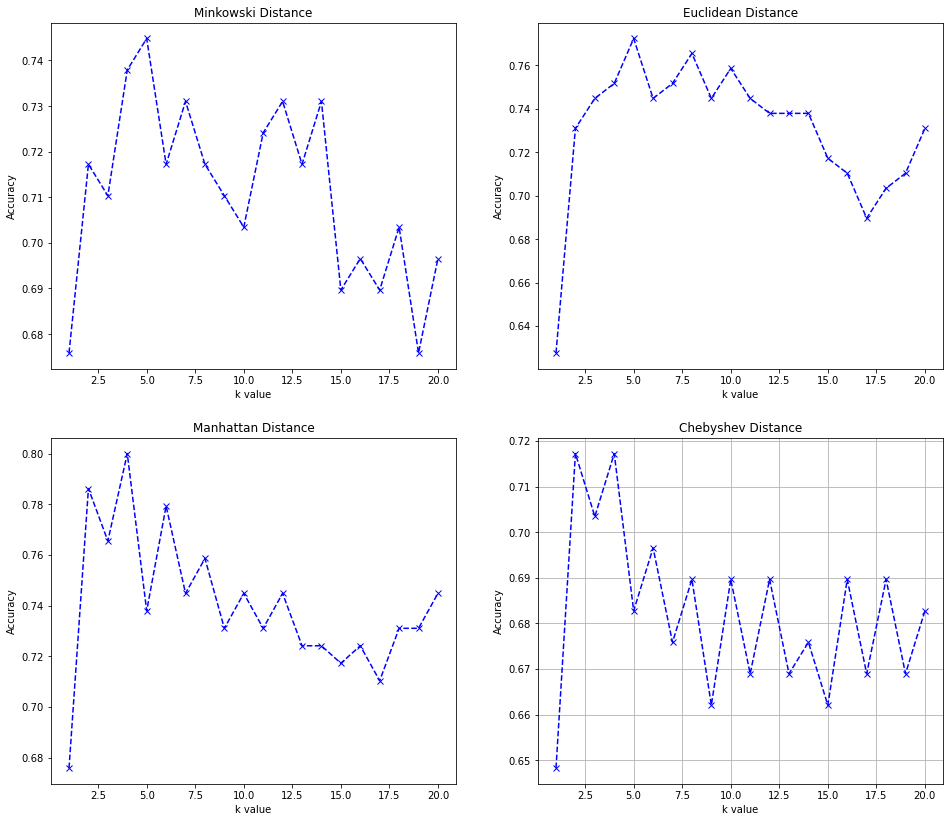

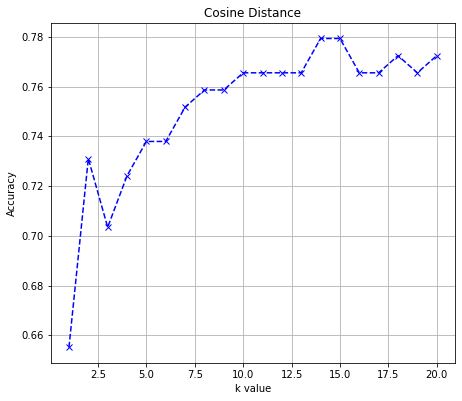

In [181]:
# plotting accuracy curve for each distance metric
fig, axs = plt.subplots(2,2,figsize=(16,14))
x = 0 
y = 0
plt.grid(True)
for ind in range(len(distance_metrics)-1):
    plt.grid(True)
    axs[x,y].plot(k_values,accuracy_distance_metrics[ind],color='blue',marker='x',linestyle='dashed')
    axs[x,y].set_title(distance_metrics[ind])
    plt.grid(True)
    plt.ylabel("Accuracy")
    plt.xlabel("k value")
    plt.grid(True)
    y += 1
    if(y == 2):
        x += 1
        y = 0

for ax in axs.flat:
    ax.set(xlabel='k value', ylabel='Accuracy')

fig, axs = plt.subplots(1,1,figsize=(7.25,6.25))
axs.plot(k_values,accuracy_distance_metrics[len(distance_metrics)-1],color='blue',marker='x',linestyle='dashed')
axs.set_title(distance_metrics[len(distance_metrics)-1])
plt.ylabel("Accuracy")
plt.xlabel("k value")

plt.grid(True)
plt.show()

In [182]:
def highest_accuracy(accuracy_array,distance_metric):
    k_indices = np.argsort(accuracy_array)
    best_k_value = np.array([val+1 for val in k_indices])[::-1][0]
    print("\n================================================\n")
    print("Distance metric used is : ",distance_metric)
    print(f"Accuraccy of model on testing data is: {round(accuracy_array[k_indices[::-1][0]]*100,2)}%")
    print(f"K value which gave highest accuracy is: {best_k_value}")
    return round(accuracy_array[k_indices[::-1][0]]*100,2), best_k_value

In [183]:
# printing highest accuracy for each distance metric
max_accuracy = 0
max_index = 0
best_k = 0
for ind in range(len(accuracy_distance_metrics)):
    acc,best_k_value = highest_accuracy(accuracy_distance_metrics[ind],distance_metrics[ind])
    if acc > max_accuracy:
        max_accuracy = acc
        max_index = ind
        best_k = best_k_value
print()



Distance metric used is :  Minkowski Distance
Accuraccy of model on testing data is: 74.48%
K value which gave highest accuracy is: 5


Distance metric used is :  Euclidean Distance
Accuraccy of model on testing data is: 77.24%
K value which gave highest accuracy is: 5


Distance metric used is :  Manhattan Distance
Accuraccy of model on testing data is: 80.0%
K value which gave highest accuracy is: 4


Distance metric used is :  Chebyshev Distance
Accuraccy of model on testing data is: 71.72%
K value which gave highest accuracy is: 2


Distance metric used is :  Cosine Distance
Accuraccy of model on testing data is: 77.93%
K value which gave highest accuracy is: 15



In [184]:
# visualizing result of best model
predictions = []
predictions = KNN(x_train,y_train,x_test,best_k,distance_metrics[max_index],4)

In [185]:
# highest accuracy is given by Manhattan Distance
a,b = highest_accuracy(accuracy_distance_metrics[max_index],distance_metrics[max_index])



Distance metric used is :  Manhattan Distance
Accuraccy of model on testing data is: 80.0%
K value which gave highest accuracy is: 4


# ```Visualizing results predicted by KNN with actual values```

In [186]:
def plot_scatter_plot(values,title):
    for ind in range(len(predictions)):
        if(np.array(values)[ind] == 1):
            plt.scatter(x_test.iloc[ind][0],x_test.iloc[ind][1],color='blue')
        else:
            plt.scatter(x_test.iloc[ind][0],x_test.iloc[ind][1],color='orange')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

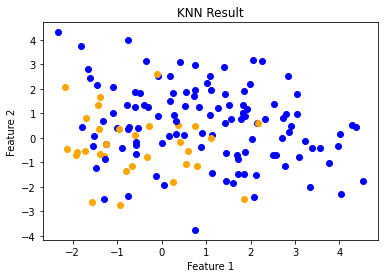

In [187]:
# plotting scatter plot for prediction made by KNN using first 2 features of test data set
plot_scatter_plot(predictions,"KNN Result")

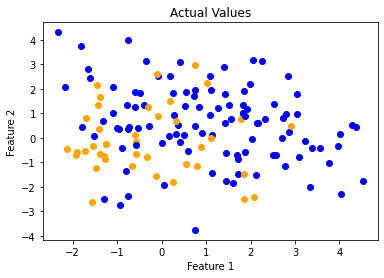

In [188]:
# plotting scatter plot for actual values of data points using first 2 features of test data set
plot_scatter_plot(y_test,"Actual Values")

# ```Classification Report for KNN Model```

Test Result:
Accuracy Score: 80.00%
_______________________________________________
CLASSIFICATION REPORT:
                    1          2  accuracy   macro avg  weighted avg
precision    0.833333   0.677419       0.8    0.755376      0.790323
recall       0.904762   0.525000       0.8    0.714881      0.800000
f1-score     0.867580   0.591549       0.8    0.729565      0.791434
support    105.000000  40.000000       0.8  145.000000    145.000000
_______________________________________________
Confusion Matrix: 
 [[95 10]
 [19 21]]

_______________________________________________
ROC_AUC score is : 0.7148809523809524


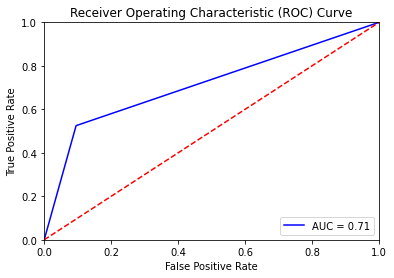

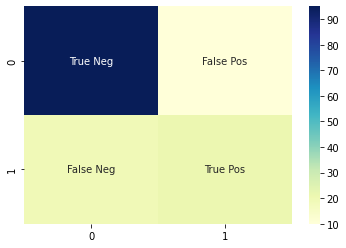

In [189]:
performance_metrics("KNN",y_test,predictions)

# ```Comparison of insights drawn from the models```

- After performing the chi-squared test on all the categorical features, we see that the p-values for all our categorical features range from 0 to 195.48. According to the chi-squared test, we rejected the features which did not have much of an effect on our target attribute, i.e., Customer Classification.

- We have also used the ANOVA test to find out the numerical features which affect the target attribute, i.e., Customer Classification.

- Therefore the number of categorical features which affect the target attribute are given below

In [190]:
# features left after chi_squares test
print(features_after_chi_sqaured_test)

Index(['Duration in Month', 'Age in years', 'Present residence since',
       'Number of existing credits at this bank', 'Customer Classification',
       'Checking Account_A14', 'Credit History_A34',
       'Personal status and sex_A93', 'Present employment since_A75',
       'Purpose_A43', 'Present employment since_A74', 'Purpose_A41',
       'Other installment plans_A143', 'Property_A121', 'Checking Account_A11',
       'Property_A123', 'Savings Account/Bonds_A65', 'Housing_A152',
       'Savings Account/Bonds_A63', 'Savings Account/Bonds_A64', 'Job_A172',
       'Personal status and sex_A94', 'Telephone_A192', 'Job_A173',
       'Checking Account_A13', 'Job_A174', 'Present employment since_A73',
       'Purpose_A49', 'Other debtors / guarantors_A101',
       'Other debtors / guarantors_A103', 'Credit History_A32',
       'Credit History_A33', 'Housing_A151', 'Property_A122', 'Purpose_A42',
       'Savings Account/Bonds_A62', 'Purpose_A48', 'Housing_A153',
       'Checking Account_A

- We see that the p-values of 'Duration in Month', 'Age in years', 'Present residence since','Number of existing credits at this bank', 'Customer Classification','Checking Account_A14', 'Credit History_A34' are higher. Hence their impact on assessing the credit on economic stability is higher

In [191]:
# features left after ANOVA test
print(json.dumps(f_scores_dict, indent = 4))

{
    "Present residence since": 29.976250818691852,
    "Number of existing credits at this bank": 25.756499112950923,
    "Age in years": 11.886909705995478,
    "Duration in Month": 4.693614687806769,
    "Installment rate in percentage of disposable income": 1.6838002436053603,
    "Credit Amount": 1.0817072208587106,
    "Number of people being liable to provide maintenance for": 0.0
}


- We can see that the f-scores of "Present Residence since", and "Number of existing credits at this bank" are very high compared to the other features. Hence these features influence in assessing the impact of credit data on economic stability.

In [192]:
MLA_columns = ['Name', 'Test Accuracy', 'Precision', 'Recall', 'AUC']
MLA_compare = pd.DataFrame(columns=MLA_columns)
index = 0

# MLA_compare
count = 0
for val in MLA:
    MLA_compare.loc[count] = MLA[val]
    count += 1
MLA_compare.sort_values(by='Test Accuracy', ascending=False, inplace=True)
MLA_compare

,Name,Test Accuracy,Precision,Recall,AUC
1,Fishers Linear Discriminant,80.000000,0.827586,0.914286,0.707143
3,KNN,80.000000,0.833333,0.904762,0.714881
2,Multilayer Perceptron,75.862069,0.836538,0.828571,0.701786
0,Random Forest,74.482759,0.854167,0.780952,0.715476


## ```Test Accuracy Comparison```

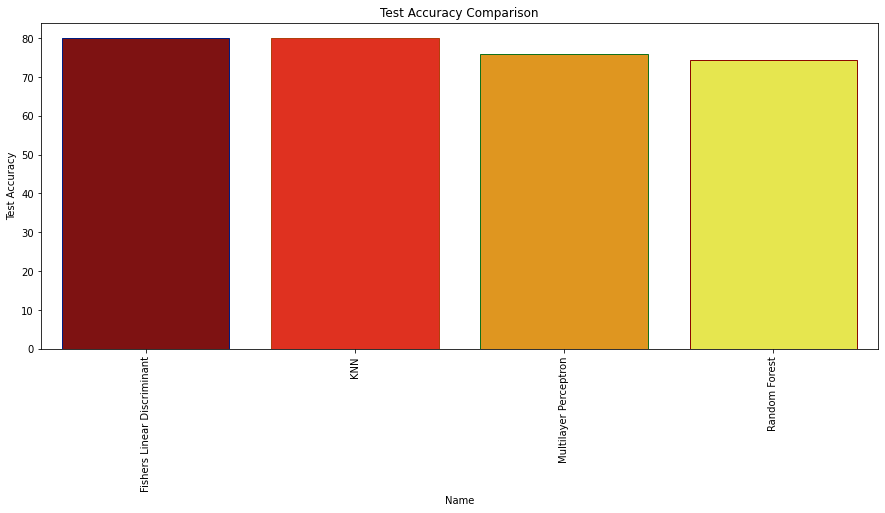

In [193]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Name", y="Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Test Accuracy Comparison')
plt.show()

## ```Precision Comparison```

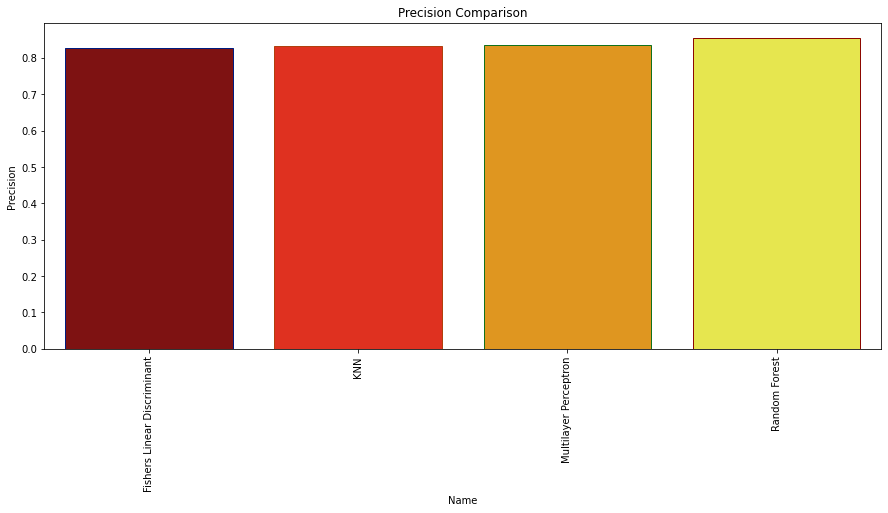

In [194]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Name", y="Precision",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Precision Comparison')
plt.show()

## ```Recall Comparison```

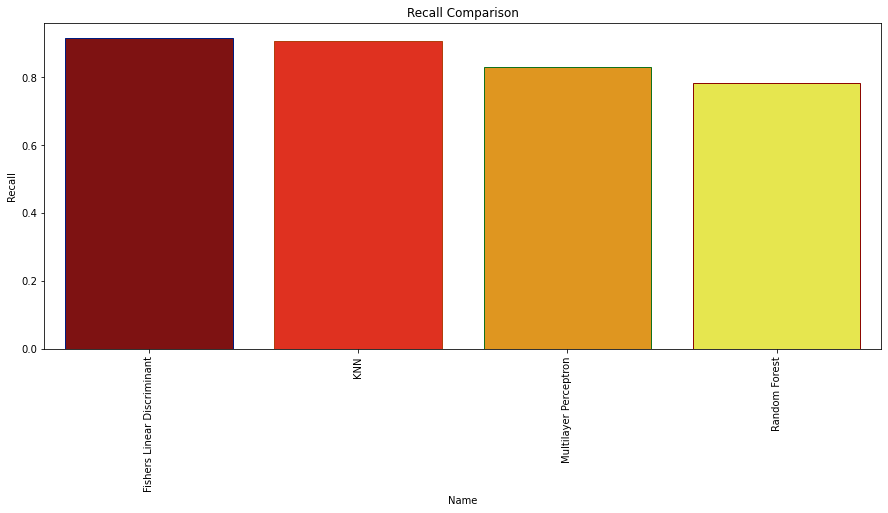

In [195]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Name", y="Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Recall Comparison')
plt.show()

## ```AUC Comparison```

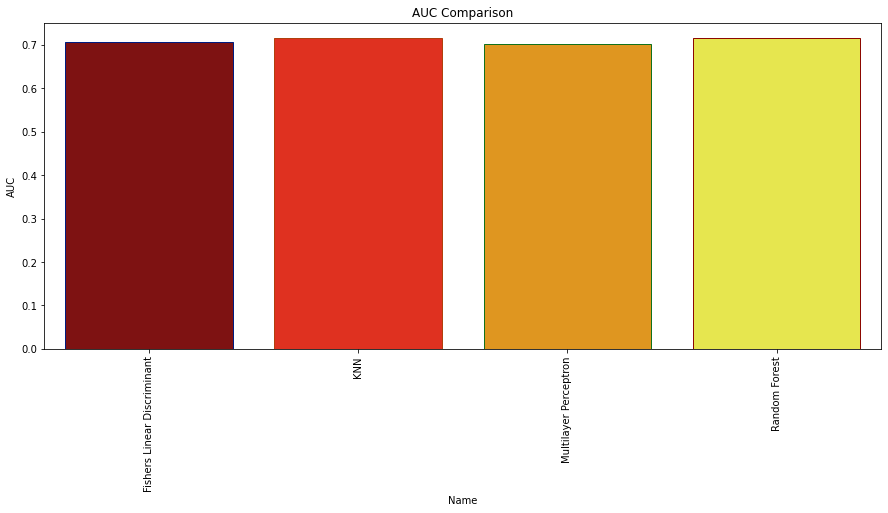

In [196]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Name", y="AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('AUC Comparison')
plt.show()

## ```ROC Curve Comparison```

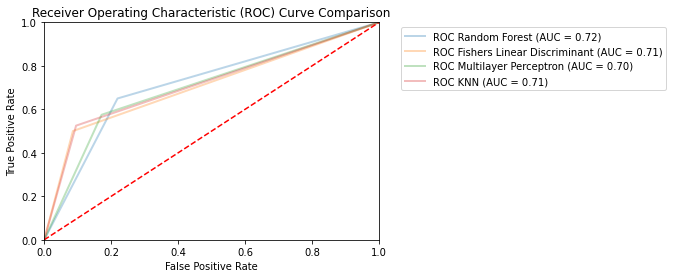

In [200]:
for algorithm in MLA_predictions:
    fpr, tpr, threshold = roc_curve(y_test,MLA_predictions[algorithm],pos_label=2)
    roc_auc = auc(fpr, tpr)
    MLA_name = algorithm
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc))
    
    
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# ```References```

Research Literature referenced for KNN
- https://iopscience.iop.org/article/10.1088/1742-6596/2161/1/012004/pdf

Other references
- https://numpy.org/doc/stable/reference/generated/numpy.dot.html

- https://pandas.pydata.org/

- https://matplotlib.org/

- https://www.geeksforgeeks.org/machine-learning/

- https://seaborn.pydata.org/